### Exploratory Data Analysis (EDA)
Now that I've cleaned the data, let's do some analysis to address our original question: "What are the characteristics of the customers who register for the term deposit account?"

I will divide our data into categorical and numeric and proceed in this way.

EDA combines parts of statistics, data visualization, and subject matter knkowledge. There is no 'right' way to perform EDA. The goal is to build basic intuition of the dataset, and answer questions regarding trends found in the data. 



### Step 1:  Feature Analysis 

A good starting stage is to examine our features one by one. By doing so I can get an idea about the shape of the distributions for each feature.

# Import libraries we need

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
import warnings
warnings.filterwarnings('ignore')

Import CSV file for Banking dataset called 'banking target'

In [349]:
data = pd.read_csv('banking target.csv')

Read Data

In [351]:
data.head(5)


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [352]:
data.shape

(45211, 17)

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [354]:
#Find Someone with previous Deposit Account: y==yes
data[data['y']=='yes']

age         job   marital  education default  balance housing loan  \
83      59      admin.   married  secondary      no     2343     yes   no   
86      56      admin.   married  secondary      no       45      no   no   
87      41  technician   married  secondary      no     1270     yes   no   
129     55    services   married  secondary      no     2476     yes   no   
168     54      admin.   married   tertiary      no      184      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
45204   73     retired   married  secondary      no     2850      no   no   
45205   25  technician    single  secondary      no      505      no  yes   
45206   51  technician   married   tertiary      no      825      no   no   
45207   71     retired  divorced    primary      no     1729      no   no   
45208   72     retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
83      unknown    5   may      1042         1     -1         0  unknown  yes  
86      unknown    5   may      1467         1     -1         0  unknown  yes  
87      unknown    5   may      1389         1     -1         0  unknown  yes  
129     unknown    5   may       579         1     -1         0  unknown  yes  
168     unknown    5   may       673         2     -1         0  unknown  yes  
...         ...  ...   ...       ...       ...    ...       ...      ...  ...  
45204  cellular   17   nov       300         1     40         8  failure  yes  
45205  cellular   17   nov       386         2     -1         0  unknown  yes  
45206  cellular   17   nov       977         3     -1         0  unknown  yes  
45207  cellular   17   nov       456         2     -1         0  unknown  yes  
45208  cellular   17   nov      1127         5    184         3  success  yes  

[5289 rows x 17 columns]

Check Data for missing/null values or duplicates

In [356]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [357]:
data.duplicated().sum()

0

In [358]:
#Get % of missing values
(data.isnull().sum()/len(data.index))*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

# Define New Categorical Features

In [360]:
# Group pdays into x number of days interval
#lets assume we would like to group them into every 3 months interval or 91 day
#intrv=91

In [479]:
# Get min and max of pdays
min_pdays = data['pdays'].min()
max_pdays = data['pdays'].max()
print(min_pdays)
print(max_pdays)

-1
871


In [481]:
#define a function called pdays_grouping
def pdays_grouping(x, intrv):
  if x==-1:
    return "No Previous Contacts"
  elif x<=intrv*1:
    return f"0-{intrv*1} Days"
  elif x<=intrv*2:
    return f"{intrv*1}-{intrv*2} Days"
  elif x<=intrv*3:
    return f"{intrv*2}-{intrv*3} Days"
  elif x<=intrv*4:
    return f"{intrv*3}-{intrv*4} Days"
  elif x<=intrv*5:
    return f"{intrv*4}-{intrv*5} Days"
  elif x<=intrv*6:
    return f"{intrv*5}-{intrv*6} Days"
  else: return f"over {intrv*6} Days"


In [483]:
#apply the function to pdays and save results into new column called pdays_group
data['pdays_group']=data['pdays'].apply(lambda x: pdays_grouping(x, 91))

In [485]:
print(data['pdays_group'].value_counts())

pdays_group
No Previous Contacts    35281
91-182 Days              2522
273-364 Days             2114
182-273 Days             1808
0-91 Days                 804
364-455 Days              506
455-546 Days               85
over 546 Days              73
Name: count, dtype: int64


In [487]:
data['pdays_group'].value_counts(normalize=True)*100

pdays_group
No Previous Contacts    81.682217
91-182 Days              5.838909
273-364 Days             4.894312
182-273 Days             4.185863
0-91 Days                1.861413
364-455 Days             1.171486
455-546 Days             0.196791
over 546 Days            0.169009
Name: proportion, dtype: float64

In [366]:
#define a new column called 'first_campaign', if pdays==-1 meaning the customer hasn't been contacted in previous campaign then first_campaign='y' else 'n'
data['first_campaign']= data['pdays'].apply(lambda x: 'y' if x == -1 else 'n')
data.first_campaign.value_counts()

first_campaign
y    36954
n     8257
Name: count, dtype: int64

Explore Data:

In [368]:
data.education.value_counts()


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [369]:
data.education.value_counts(normalize=True)*100


education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

In [370]:
data.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [371]:
data.marital.value_counts(normalize=True)*100

marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64

In [372]:
data.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [373]:
data.housing.value_counts(normalize=True)*100

housing
yes    55.583818
no     44.416182
Name: proportion, dtype: float64

In [374]:
data.first_campaign.value_counts(normalize=True)*100

first_campaign
y    81.736745
n    18.263255
Name: proportion, dtype: float64

In [375]:
#Let's explore numerical features. Note: 'describe' by default only runs on numeric values

In [376]:
data.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [377]:
#If you would like to include variables with 'Object' type use describe(include='object')
#T is for Transpose

In [378]:
data.describe(include='object').T

count unique                   top   freq
job             45211     12           blue-collar   9732
marital         45211      3               married  27214
education       45211      4             secondary  23202
default         45211      2                    no  44396
housing         45211      2                   yes  25130
loan            45211      2                    no  37967
contact         45211      3              cellular  29285
month           45211     12                   may  13766
poutcome        45211      4               unknown  36959
y               45211      2                    no  39922
pdays_group     45211      8  No Previous Contacts  36954
first_campaign  45211      2                     y  36954

# Renaming some columns

In [489]:
#rename y to target
data = data.rename(columns={'y': 'target'})

In [381]:
#rename Campaign to contact_count
data=data.rename(columns={'campaign':'contact_count'})

In [382]:
#rename previous to p_contact_count
data=data.rename(columns={'previous':'p_contact_count'})

In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   default          45211 non-null  object
 5   balance          45211 non-null  int64 
 6   housing          45211 non-null  object
 7   loan             45211 non-null  object
 8   contact          45211 non-null  object
 9   day              45211 non-null  int64 
 10  month            45211 non-null  object
 11  duration         45211 non-null  int64 
 12  contact_count    45211 non-null  int64 
 13  pdays            45211 non-null  int64 
 14  p_contact_count  45211 non-null  int64 
 15  poutcome         45211 non-null  object
 16  target           45211 non-null  object
 17  pdays_group      45211 non-null

In [491]:
#Change target 'yes' to deposit and 'no' to 'no-deposit'
data['target']=data['target'].replace({'yes':'deposit','no':'no-deposit'})

In [493]:
data.target.value_counts()

target
no-deposit    38172
deposit        5021
Name: count, dtype: int64

In [386]:
data.target.value_counts(normalize=True)*100

target
no-deposit    88.30152
deposit       11.69848
Name: proportion, dtype: float64

In [387]:
#export the file so you can also use other tools for visualization
data.to_csv('banking_data_renamed.csv',index=False)

In [388]:
#Create 2 data frames that has statistic values 1 for deposit, 2 for no-deposit
Deposit=data[data['target']=='deposit'].describe().T
Deposit

count         mean          std     min    25%    50%  \
age              5289.0    41.670070    13.497781    18.0   31.0   38.0   
balance          5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0   
day              5289.0    15.158253     8.501875     1.0    8.0   15.0   
duration         5289.0   537.294574   392.525262     8.0  244.0  426.0   
contact_count    5289.0     2.141047     1.921826     1.0    1.0    2.0   
pdays            5289.0    68.702968   118.822266    -1.0   -1.0   -1.0   
p_contact_count  5289.0     1.170354     2.553272     0.0    0.0    0.0   

                    75%      max  
age                50.0     95.0  
balance          2159.0  81204.0  
day                22.0     31.0  
duration          725.0   3881.0  
contact_count       3.0     32.0  
pdays              98.0    854.0  
p_contact_count     1.0     58.0

In [389]:
no_Deposit=data[data['target']=='no-deposit'].describe().T
no_Deposit

count         mean          std     min   25%    50%  \
age              39922.0    40.838986    10.172662    18.0  33.0   39.0   
balance          39922.0  1303.714969  2974.195473 -8019.0  58.0  417.0   
day              39922.0    15.892290     8.294728     1.0   8.0   16.0   
duration         39922.0   221.182806   207.383237     0.0  95.0  164.0   
contact_count    39922.0     2.846350     3.212767     1.0   1.0    2.0   
pdays            39922.0    36.421372    96.757135    -1.0  -1.0   -1.0   
p_contact_count  39922.0     0.502154     2.256771     0.0   0.0    0.0   

                    75%       max  
age                48.0      95.0  
balance          1345.0  102127.0  
day                21.0      31.0  
duration          279.0    4918.0  
contact_count       3.0      63.0  
pdays              -1.0     871.0  
p_contact_count     0.0     275.0

In [390]:
Deposit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, age to p_contact_count
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   7 non-null      float64
 1   mean    7 non-null      float64
 2   std     7 non-null      float64
 3   min     7 non-null      float64
 4   25%     7 non-null      float64
 5   50%     7 non-null      float64
 6   75%     7 non-null      float64
 7   max     7 non-null      float64
dtypes: float64(8)
memory usage: 804.0+ bytes


# **Data Exploring- Visualization**

In [392]:
colors = ['#acfffc', '#fc2647','#49759c', '#3d7afd','#ffff33','#014182','#b1d1fc','#0d75f8','#c1fd95','#ff724c','#80f9ad','#fffd37','#c79fef']#Note:highest number will be represented by last color in this list

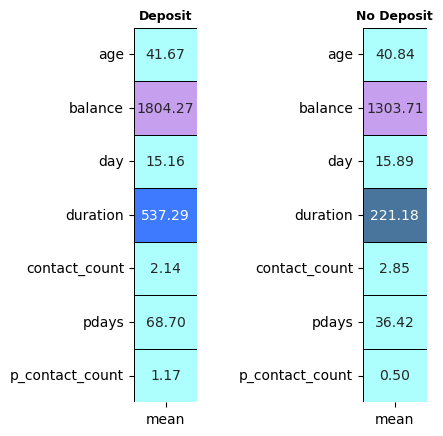

In [393]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Deposit[['mean']],annot = True, cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Deposit', fontsize=9, fontweight='bold')


plt.subplot(1,2,2)
sns.heatmap(no_Deposit[['mean']],annot = True, cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Deposit', fontsize=9, fontweight='bold')

fig.tight_layout(pad = 3)

In [394]:
# we are comparing all variables means in 2 different result of Deposit and no_Deposit

#duration of call for those who opened a deposit account are much higher 538 vs 222
#those customers who opened a CD normally have a higher avg balance $1800  vs $1300

#Average or Mean of age are very close for both
#Majority are similar except pdays.


In [395]:
#create an empty list for numerical features
numerical_features = []

In [396]:
#create an empty list for categorical feauters
categorical_features = []

In [397]:
#check the type for categorical features
type(categorical_features)

list

In [398]:
#see all columns in data dataframe
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'contact_count', 'pdays',
       'p_contact_count', 'poutcome', 'target', 'pdays_group',
       'first_campaign'],
      dtype='object')

In [399]:
#put object/categorical data in categorical feature and numeric in numeric
#if you run this more than once, it keeps adding to the list
for column in list(data.columns):
  if data[column].dtypes == 'object':
    categorical_features.append(column)
  else:
    numerical_features.append(column)

In [400]:
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'target', 'pdays_group', 'first_campaign']


In [401]:
print(numerical_features)

['age', 'balance', 'day', 'duration', 'contact_count', 'pdays', 'p_contact_count']


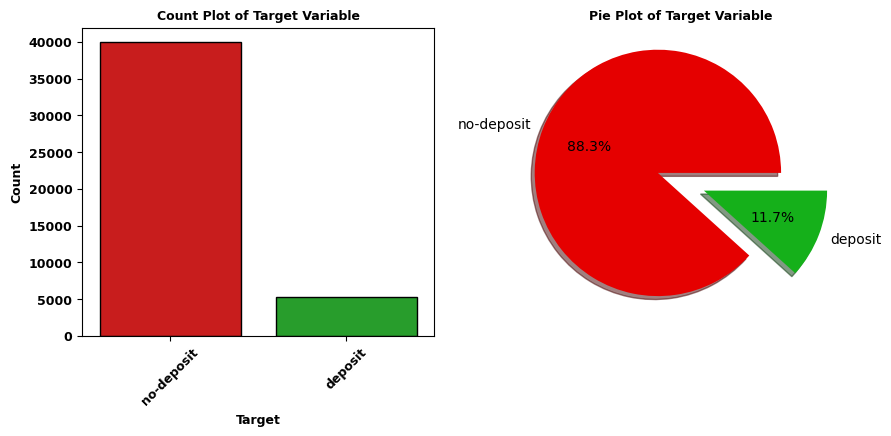

In [402]:
#Target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
colors_RGY =['#e50000','#15b01a','#ffff14']

plt.subplot(1, 2, 1)
sns.countplot(x='target', data=data, palette=colors_RGY, edgecolor='black' ,width=0.8)


plt.title('Count Plot of Target Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Target', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['target'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors_RGY, explode=[0.2, 0.2])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Target Variable', fontsize=9, fontweight='bold')

plt.show()

In [403]:
# 88% vs 12% shows our data is imbalanced

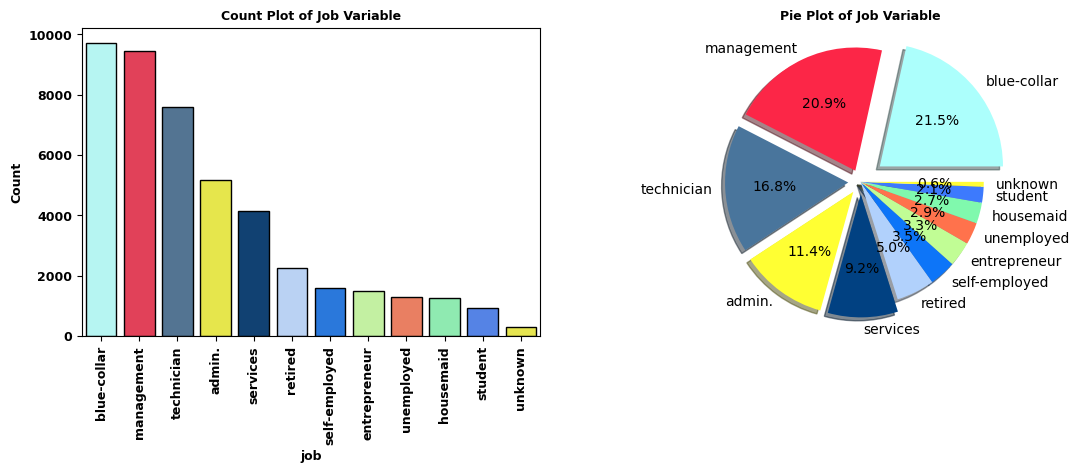

In [404]:
#  job
colors = ['#acfffc', '#fc2647','#49759c', '#ffff33','#014182','#b1d1fc','#0d75f8','#c1fd95','#ff724c','#80f9ad','#3d7afd','#fffd37','#c79fef']
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='job', data=data, palette=colors, edgecolor='black',
                   order=data['job'].value_counts().index, width=0.8)


plt.title('Count Plot of Job Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('job', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['job'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.2, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0 , 0.0, 0.0, 0.0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Job Variable', fontsize=9, fontweight='bold')

plt.show()

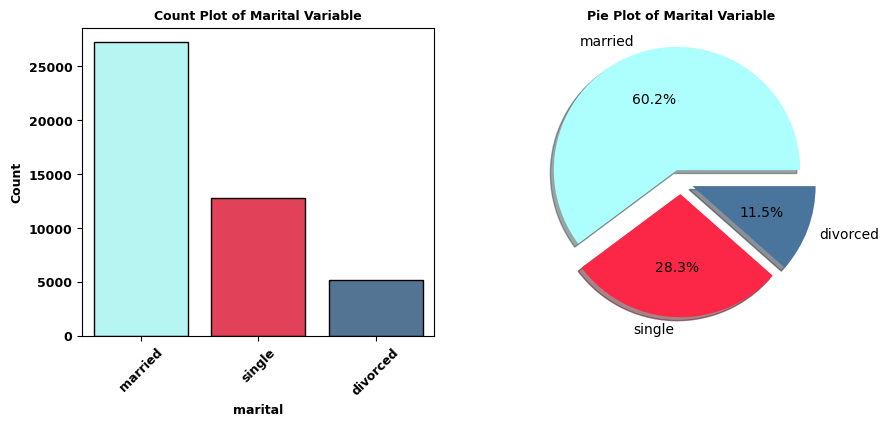

In [405]:
#marital status
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='marital', data=data, palette=colors, edgecolor='black',
                   order=data['marital'].value_counts().index, width=0.8)



plt.title('Count Plot of Marital Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('marital', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['marital'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0.1, 0.1])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Marital Variable', fontsize=9, fontweight='bold')

plt.show()

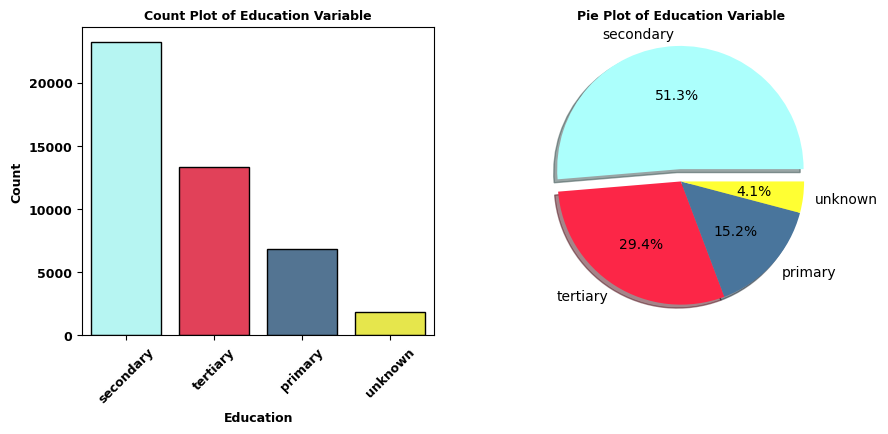

In [406]:
#Education Charts
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='education', data=data, palette=colors, edgecolor='black',
                   order=data['education'].value_counts().index, width=0.8)



plt.title('Count Plot of Education Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Education', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['education'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Education Variable', fontsize=9, fontweight='bold')

plt.show()

In [407]:
#unknown Education acts like missing value since it is a small% of total data. However, if we have a very small sample size we should keep this value

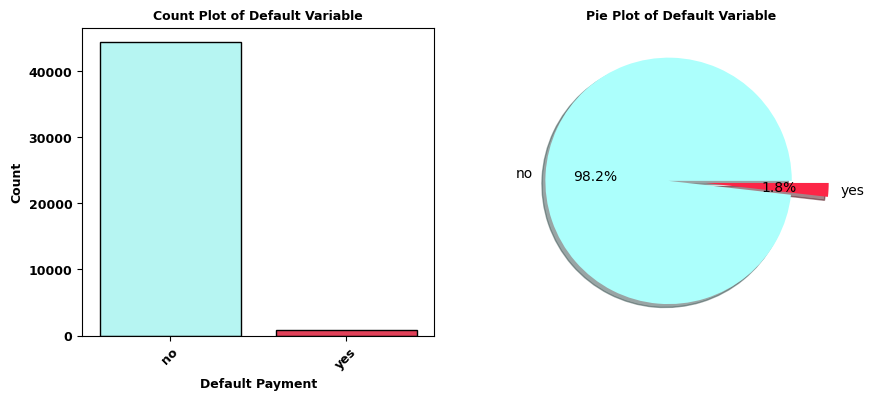

In [408]:
#default feature (missing a payment) charts
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='default', data=data, palette=colors, edgecolor='black',
                   order=data['default'].value_counts().index, width=0.8)


plt.title('Count Plot of Default Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Default Payment', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['default'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0.2])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Default Variable', fontsize=9, fontweight='bold')

plt.show()

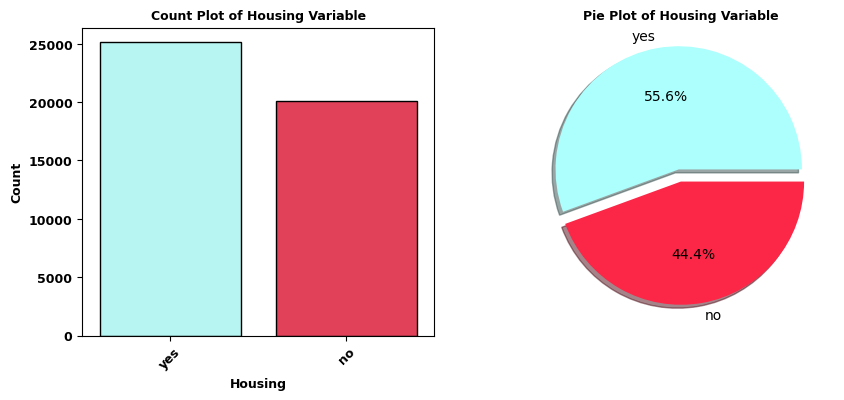

In [409]:
#housing
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='housing', data=data, palette=colors, edgecolor='black',
                   order=data['housing'].value_counts().index, width=0.8)



plt.title('Count Plot of Housing Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Housing', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['housing'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Housing Variable', fontsize=9, fontweight='bold')

plt.show()

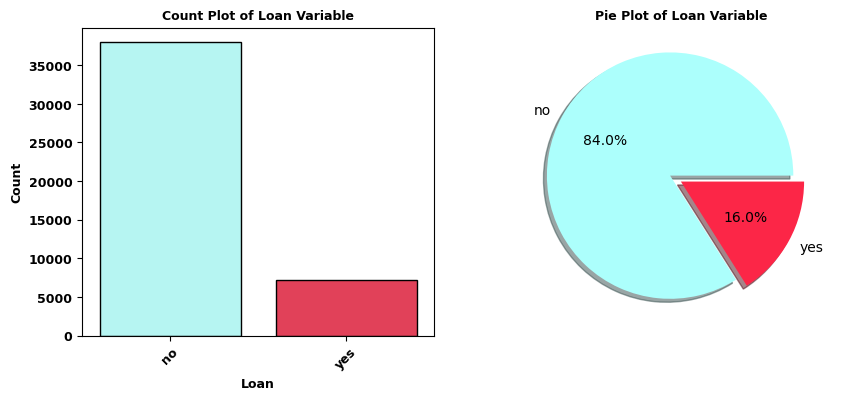

In [410]:
#Loan chart
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='loan', data=data, palette=colors, edgecolor='black',
                   order=data['loan'].value_counts().index, width=0.8)



plt.title('Count Plot of Loan Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Loan', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['loan'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Loan Variable', fontsize=9, fontweight='bold')

plt.show()

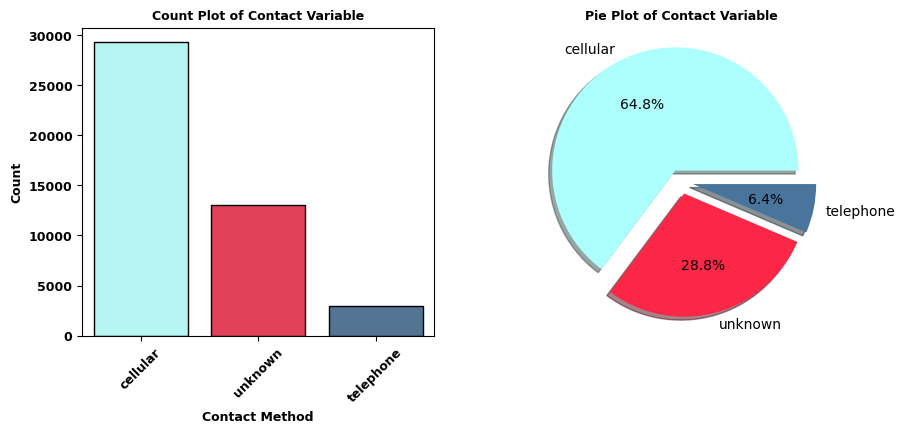

In [411]:
#Contact Method Charts
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='contact', data=data, palette=colors, edgecolor='black',
                   order=data['contact'].value_counts().index, width=0.8)



plt.title('Count Plot of Contact Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Contact Method', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['contact'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0.1, 0.1])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Contact Variable', fontsize=9, fontweight='bold')

plt.show()

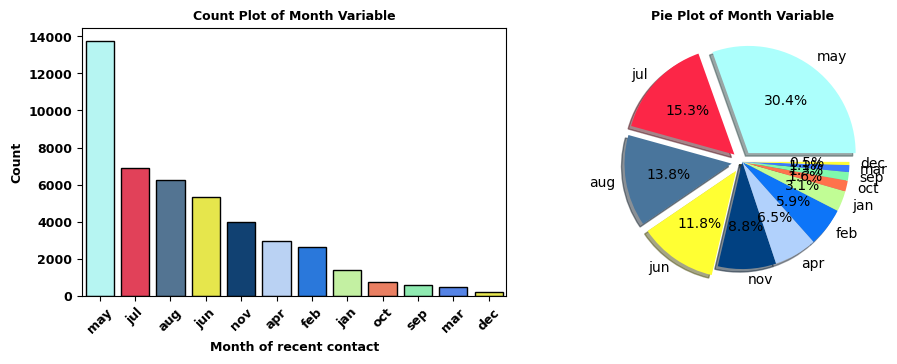

In [412]:
#Month of the contact
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='month', data=data, palette=colors, edgecolor='black',
                   order=data['month'].value_counts().index, width=0.8)


plt.title('Count Plot of Month Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Month of recent contact', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['month'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0 ,0 ,0 ,0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Month Variable', fontsize=9, fontweight='bold')
plt.tight_layout(pad=2)

plt.show()

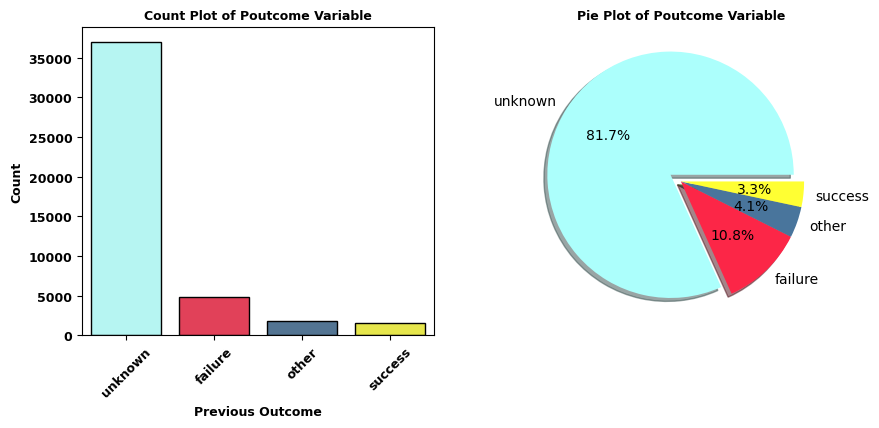

In [413]:
#Previous Outcome
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='poutcome', data=data, palette=colors, edgecolor='black',
                   order=data['poutcome'].value_counts().index, width=0.8)



plt.title('Count Plot of Poutcome Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Previous Outcome', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['poutcome'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Poutcome Variable', fontsize=9, fontweight='bold')

plt.show()

In [414]:
#We can't eliminate unknown in poutcome here. This is the result of previous campaigns and big portion of our data

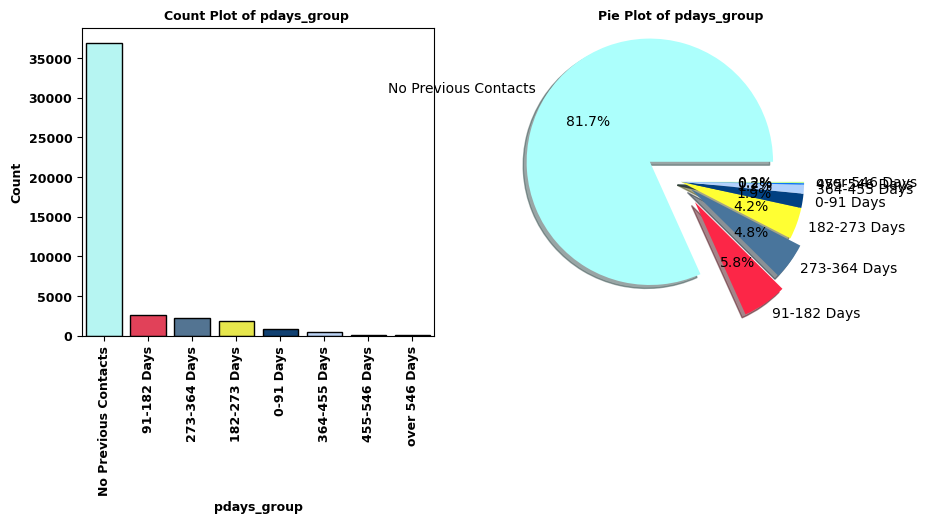

In [415]:
#pdays_group
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='pdays_group', data=data, palette=colors, edgecolor='black',
                   order=data['pdays_group'].value_counts().index, width=0.8)



plt.title('Count Plot of pdays_group ', fontsize=9, fontweight='bold')
plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('pdays_group', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['pdays_group'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.3, 0.2, 0.1,0,0,0,0,0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of pdays_group', fontsize=9, fontweight='bold')

plt.show()

In [416]:
# after checking the # and % of those customers with no previous contacts we can see the reason we have "Unknown" previous outcome is because they haven't been contacted before. similar %

In [417]:
#We would like to eliminate or drop those rows with Unknow Job:
data[data['job'] == 'unknown']

age      job   marital education default  balance housing loan  \
4       33  unknown    single   unknown      no        1      no   no   
216     47  unknown   married   unknown      no       28      no   no   
354     59  unknown  divorced   unknown      no       27      no   no   
876     37  unknown    single   unknown      no      414     yes   no   
1072    29  unknown    single   primary      no       50     yes   no   
...    ...      ...       ...       ...     ...      ...     ...  ...   
44714   45  unknown   married  tertiary      no      406      no   no   
44742   64  unknown   married   unknown      no     2799      no   no   
44970   28  unknown    single   unknown      no      326      no   no   
45141   77  unknown   married   unknown      no      397      no   no   
45186   59  unknown   married   unknown      no     1500      no   no   

         contact  day month  duration  contact_count  pdays  p_contact_count  \
4        unknown    5   may       198              1     -1                0   
216      unknown    5   may       338              2     -1                0   
354      unknown    5   may       347              3     -1                0   
876      unknown    7   may       131              1     -1                0   
1072     unknown    7   may        50              2     -1                0   
...          ...  ...   ...       ...            ...    ...              ...   
44714   cellular    7   sep       314              1     -1                0   
44742  telephone    9   sep       378              4     -1                0   
44970   cellular   11   oct       450              1    231                1   
45141  telephone    8   nov       207              1    185                3   
45186   cellular   16   nov       280              1    104                2   

      poutcome      target           pdays_group first_campaign  
4      unknown  no-deposit  No Previous Contacts              y  
216    unknown  no-deposit  No Previous Contacts              y  
354    unknown  no-deposit  No Previous Contacts              y  
876    unknown  no-deposit  No Previous Contacts              y  
1072   unknown  no-deposit  No Previous Contacts              y  
...        ...         ...                   ...            ...  
44714  unknown     deposit  No Previous Contacts              y  
44742  unknown  no-deposit  No Previous Contacts              y  
44970  success     deposit          182-273 Days              n  
45141  success  no-deposit          182-273 Days              n  
45186  failure  no-deposit           91-182 Days              n  

[288 rows x 19 columns]

In [418]:
#we have 288 rows with unknown job

In [419]:
#we also would like to drop those rows with unknown Education
data[data['education'] == 'unknown']

age          job  marital education default  balance housing loan  \
3       47  blue-collar  married   unknown      no     1506     yes   no   
4       33      unknown   single   unknown      no        1      no   no   
13      58   technician  married   unknown      no       71     yes   no   
16      45       admin.   single   unknown      no       13     yes   no   
42      60  blue-collar  married   unknown      no      104     yes   no   
...    ...          ...      ...       ...     ...      ...     ...  ...   
45129   46   technician  married   unknown      no     3308      no   no   
45141   77      unknown  married   unknown      no      397      no   no   
45150   65   management  married   unknown      no     2352      no   no   
45158   34      student   single   unknown      no     2321      no   no   
45186   59      unknown  married   unknown      no     1500      no   no   

         contact  day month  duration  contact_count  pdays  p_contact_count  \
3        unknown    5   may        92              1     -1                0   
4        unknown    5   may       198              1     -1                0   
13       unknown    5   may        71              1     -1                0   
16       unknown    5   may        98              1     -1                0   
42       unknown    5   may        22              1     -1                0   
...          ...  ...   ...       ...            ...    ...              ...   
45129   cellular   27   oct       171              1     91                2   
45141  telephone    8   nov       207              1    185                3   
45150   cellular    8   nov       354              3    188               13   
45158   cellular    9   nov       600              2     99                5   
45186   cellular   16   nov       280              1    104                2   

      poutcome      target           pdays_group first_campaign  
3      unknown  no-deposit  No Previous Contacts              y  
4      unknown  no-deposit  No Previous Contacts              y  
13     unknown  no-deposit  No Previous Contacts              y  
16     unknown  no-deposit  No Previous Contacts              y  
42     unknown  no-deposit  No Previous Contacts              y  
...        ...         ...                   ...            ...  
45129  success     deposit             0-91 Days              n  
45141  success  no-deposit          182-273 Days              n  
45150  success  no-deposit          182-273 Days              n  
45158  failure  no-deposit           91-182 Days              n  
45186  failure  no-deposit           91-182 Days              n  

[1857 rows x 19 columns]

In [420]:
# there are 1857 rows with unknown education

In [421]:
data.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [422]:
data.education.value_counts(normalize=True)*100

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

In [423]:
data.job.value_counts(normalize=True)*100

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

In [424]:
#Let's make a copy of our data before dropping Unknown education and Unknown Job
Data_all_rows = data.copy()

In [425]:
Data_all_rows.shape

(45211, 19)

In [426]:
#Below code will give a dataframe in which rows with unknown job and unknown education are dropped
data.drop(data[(data['job'] == 'unknown') | (data['education'] == 'unknown')].index)

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  contact_count  pdays  p_contact_count  \
0        unknown    5   may       261              1     -1                0   
1        unknown    5   may       151              1     -1                0   
2        unknown    5   may        76              1     -1                0   
5        unknown    5   may       139              1     -1                0   
6        unknown    5   may       217              1     -1                0   
...          ...  ...   ...       ...            ...    ...              ...   
45206   cellular   17   nov       977              3     -1                0   
45207   cellular   17   nov       456              2     -1                0   
45208   cellular   17   nov      1127              5    184                3   
45209  telephone   17   nov       508              4     -1                0   
45210   cellular   17   nov       361              2    188               11   

      poutcome      target           pdays_group first_campaign  
0      unknown  no-deposit  No Previous Contacts              y  
1      unknown  no-deposit  No Previous Contacts              y  
2      unknown  no-deposit  No Previous Contacts              y  
5      unknown  no-deposit  No Previous Contacts              y  
6      unknown  no-deposit  No Previous Contacts              y  
...        ...         ...                   ...            ...  
45206  unknown     deposit  No Previous Contacts              y  
45207  unknown     deposit  No Previous Contacts              y  
45208  success     deposit          182-273 Days              n  
45209  unknown  no-deposit  No Previous Contacts              y  
45210    other  no-deposit          182-273 Days              n  

[43193 rows x 19 columns]

In [427]:
#see the index for rows with Unknown education and job
(data[(data['job'] == 'unknown') | (data['education'] == 'unknown')].index)

Index([    3,     4,    13,    16,    42,    44,    57,    58,    64,    93,
       ...
       44983, 45022, 45055, 45098, 45109, 45129, 45141, 45150, 45158, 45186],
      dtype='int64', length=2018)

## Handiling Unknown Values : Job and Education

In [429]:
#Let's drop Unknown education and Unknown jobs
data=data.drop(data[(data['job'] == 'unknown') | (data['education'] == 'unknown')].index)
data.shape

(43193, 19)

In [430]:
#Now we have 43,193 rows of data

In [431]:
#Working on bi-variables visualizations

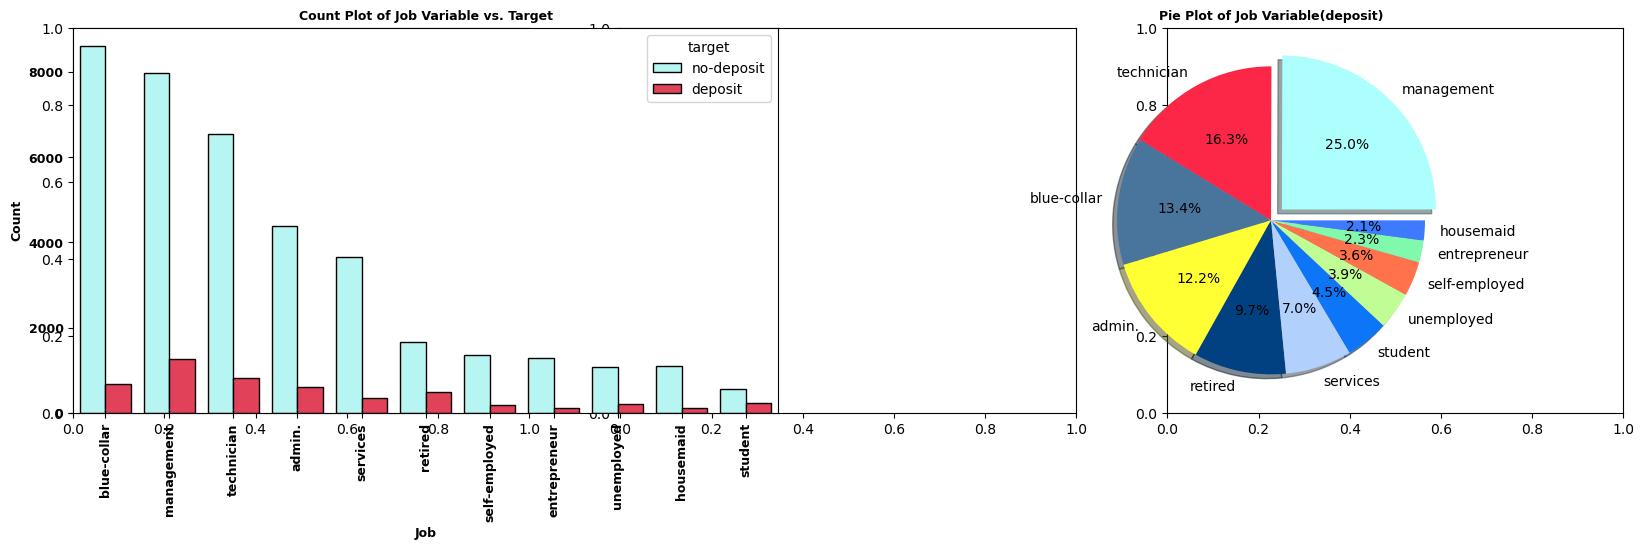

In [432]:
# illustration of job and target for deposit and no-deposit
#pie chart shows jobs for deposit only
fig = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='job', data=data, palette=colors, edgecolor='black',
                   order=data['job'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Job Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Job', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['job'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0, 0, 0 , 0 , 0, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Job Variable(deposit)', fontsize=9, fontweight='bold')

plt.show()



In [433]:
#in pie chart we see only those jobs that have deposits. Management has the highest number

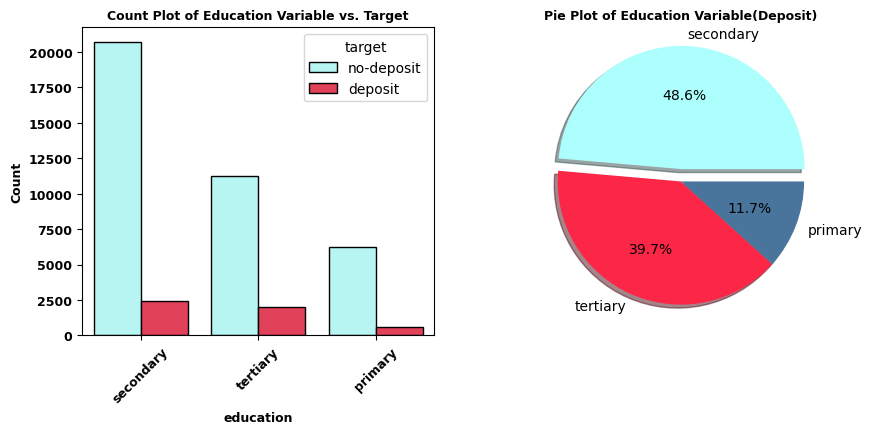

In [434]:
#education and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='education', data=data, palette=colors, edgecolor='black',
                   order=data['education'].value_counts().index, width=0.8, hue=data['target'])


plt.title('Count Plot of Education Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('education', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['education'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Education Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

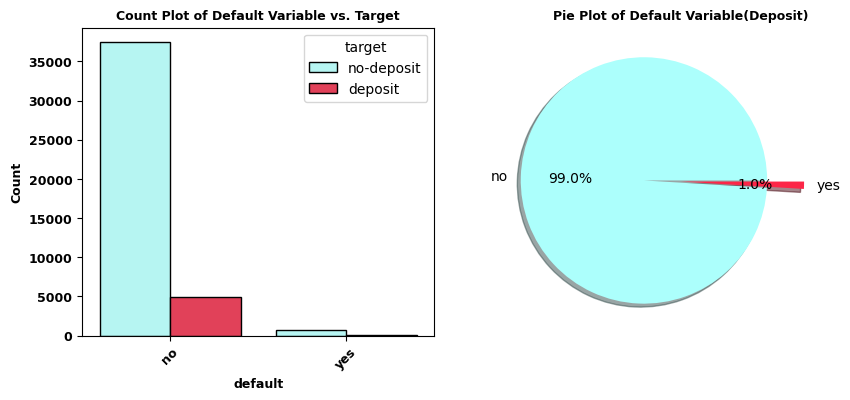

In [435]:
#Default and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='default', data=data, palette=colors, edgecolor='black',
                   order=data['default'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Default Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('default', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['default'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.3, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Default Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

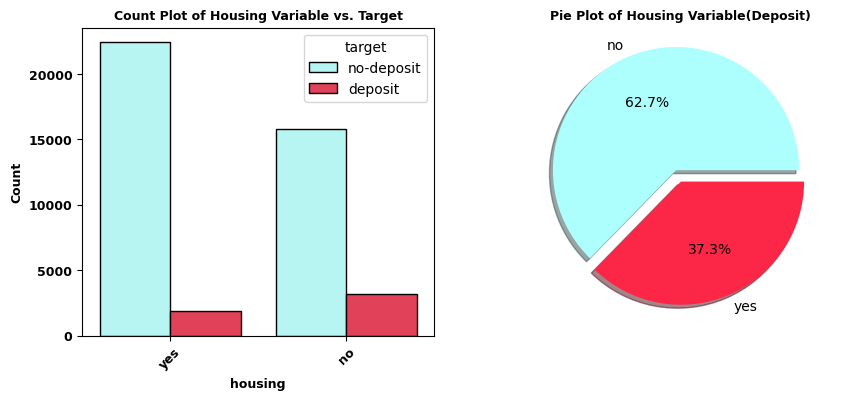

In [436]:
#housing and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='housing', data=data, palette=colors, edgecolor='black',
                   order=data['housing'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Housing Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('housing', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['housing'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Housing Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

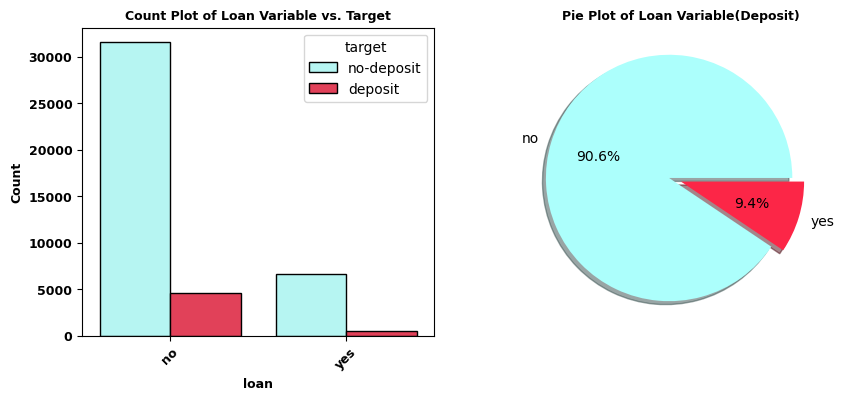

In [437]:
#loan and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='loan', data=data, palette=colors, edgecolor='black',
                   order=data['loan'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Loan Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('loan', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['loan'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Loan Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43193 non-null  int64 
 1   job              43193 non-null  object
 2   marital          43193 non-null  object
 3   education        43193 non-null  object
 4   default          43193 non-null  object
 5   balance          43193 non-null  int64 
 6   housing          43193 non-null  object
 7   loan             43193 non-null  object
 8   contact          43193 non-null  object
 9   day              43193 non-null  int64 
 10  month            43193 non-null  object
 11  duration         43193 non-null  int64 
 12  contact_count    43193 non-null  int64 
 13  pdays            43193 non-null  int64 
 14  p_contact_count  43193 non-null  int64 
 15  poutcome         43193 non-null  object
 16  target           43193 non-null  object
 17  pdays_group      43193 non-null  obj

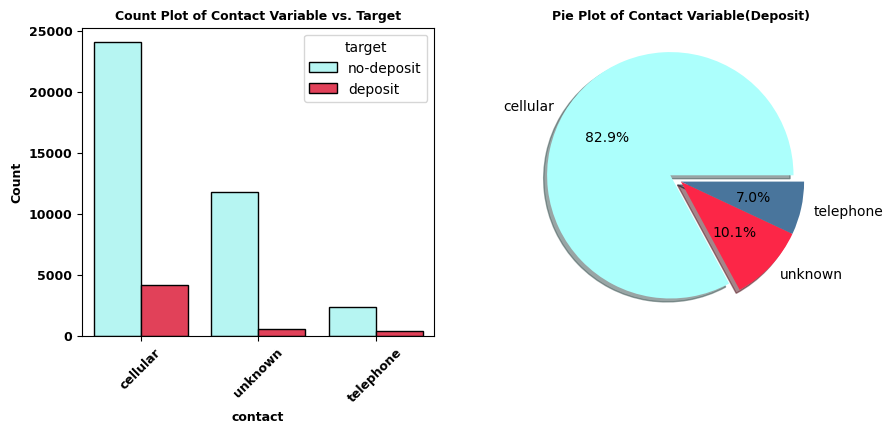

In [439]:
#contact and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='contact', data=data, palette=colors, edgecolor='black',
                   order=data['contact'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Contact Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('contact', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['contact'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Contact Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

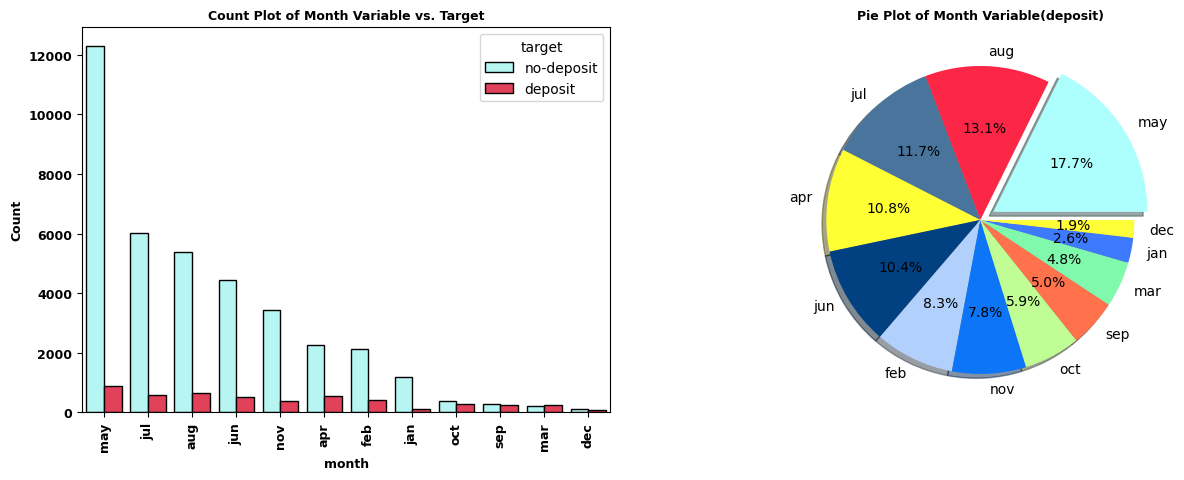

In [440]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='month', data=data, palette=colors, edgecolor='black',
                   order=data['month'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Month Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('month', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['month'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0, 0, 0 , 0 , 0, 0, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Month Variable(deposit)', fontsize=9, fontweight='bold')

plt.show()

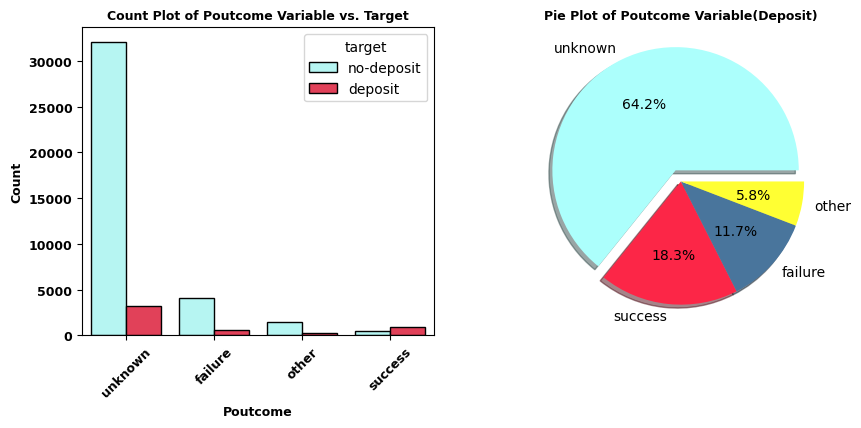

In [441]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='poutcome', data=data, palette=colors, edgecolor='black',
                   order=data['poutcome'].value_counts().index, width=0.8, hue='target')


plt.title('Count Plot of Poutcome Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Poutcome', fontsize=9, fontweight='bold')



plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['poutcome'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Poutcome Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

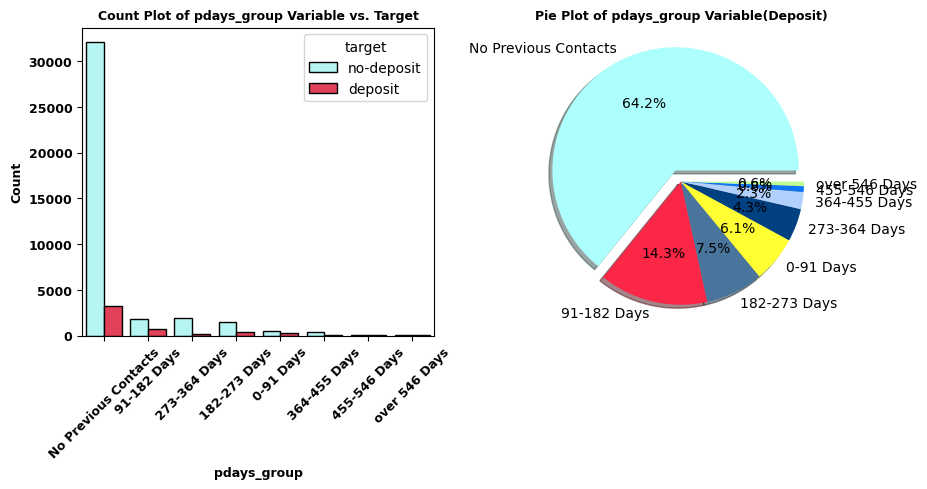

In [442]:
#pdays group
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='pdays_group', data=data, palette=colors, edgecolor='black',
                   order=data['pdays_group'].value_counts().index, width=0.8, hue='target')


plt.title('Count Plot of pdays_group Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('pdays_group', fontsize=9, fontweight='bold')



plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['pdays_group'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0, 0, 0 , 0 , 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of pdays_group Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()


#plt.subplot(1, 3, 3)
#l = data[data['target'] == 'no-deposit']['pdays_group'].value_counts()
#pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0, 0, 0 , 0 , 0])
#pie_plot.set_ylabel('')
#plt.title('Pie Plot of pdays_group Variable(No-Deposit)', fontsize=9, fontweight='bold')
#
#plt.show()

In [443]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'contact_count', 'pdays',
       'p_contact_count', 'poutcome', 'target', 'pdays_group',
       'first_campaign'],
      dtype='object')

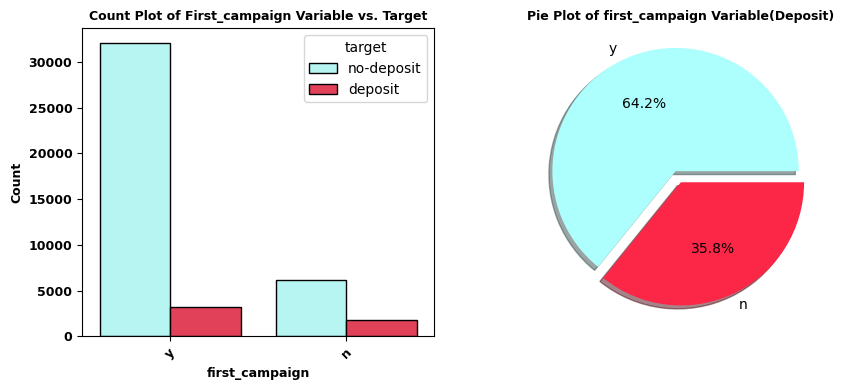

In [444]:
#first campaign vs target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='first_campaign', data=data, palette=colors, edgecolor='black',
                   order=data['first_campaign'].value_counts().index, width=0.8, hue='target')


plt.title('Count Plot of First_campaign Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('first_campaign', fontsize=9, fontweight='bold')



plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['first_campaign'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of first_campaign Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

In [445]:
data.first_campaign.value_counts(normalize=True)*100

first_campaign
y    81.682217
n    18.317783
Name: proportion, dtype: float64

In [446]:
#65% of those who opened deposit are those who have not been contacted in previous campaigns
#This could imply that the bank has a high chance in convincing clients of their untapped market

In [447]:
# we also need to consider that 82% of people we targetted were new and first campaign

In [448]:
#numerical Features visualization:

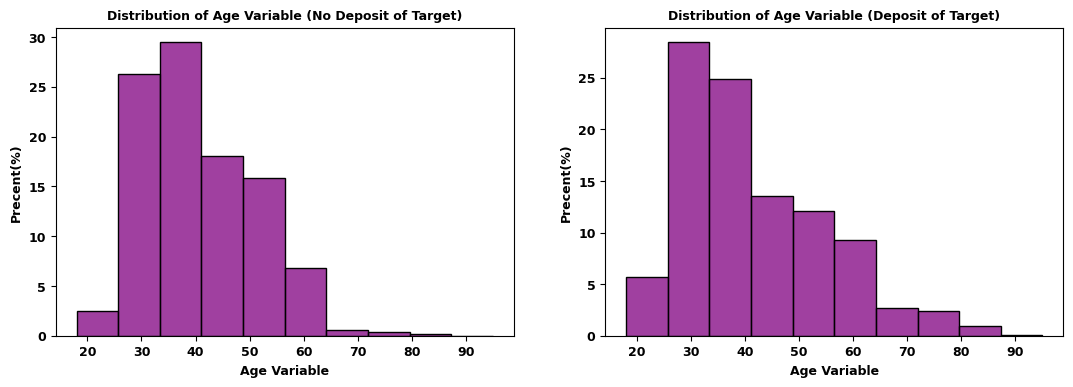

In [449]:
#age
fig = plt.subplots(nrows=1, ncols=2, figsize=(13 , 4))
plt.subplot(1, 2, 1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='age', color='purple',
             edgecolor='black', stat='percent', element='bars', bins=10)


plt.title('Distribution of Age Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Age Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='age', color='purple',
             edgecolor='black', stat='percent', element='bars', bins=10)


plt.title('Distribution of Age Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Age Variable', fontsize=9, fontweight='bold')

plt.show()

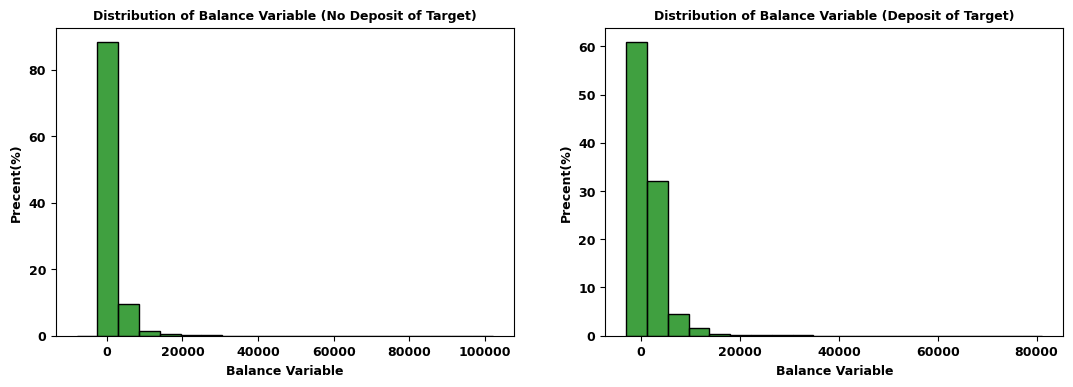

In [450]:
#balance
fig=plt.subplots(nrows=1, ncols=2, figsize=(13 , 4))

plt.subplot(1, 2,1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='balance', color='green',
             edgecolor='black', stat='percent', element='bars', bins=20)

plt.title('Distribution of Balance Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Balance Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='balance', color='green',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Balance Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Balance Variable', fontsize=9, fontweight='bold')


plt.show()

In [451]:
#there are 3634 rows with negative balance, this project includes all balanaces

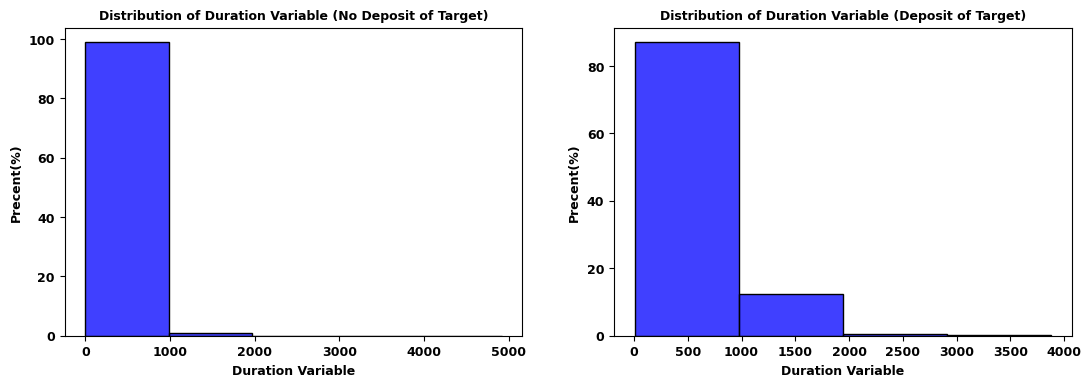

In [452]:
#duration vs target
fig=plt.subplots(nrows=1, ncols=2, figsize=(13 , 4))

plt.subplot(1, 2,1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='duration', color='blue',
             edgecolor='black', stat='percent', element='bars', bins=5)

plt.title('Distribution of Duration Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Duration Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='duration', color='blue',
             edgecolor='black', stat='percent', element='bars', bins=4)


plt.title('Distribution of Duration Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Duration Variable', fontsize=9, fontweight='bold')


plt.show()

In [453]:
#duration of calls to those clients with no deposit barely exceed 1000 seconds (almost 95% are less than 1000) but duration of calls to clients who opened deposit account are longer

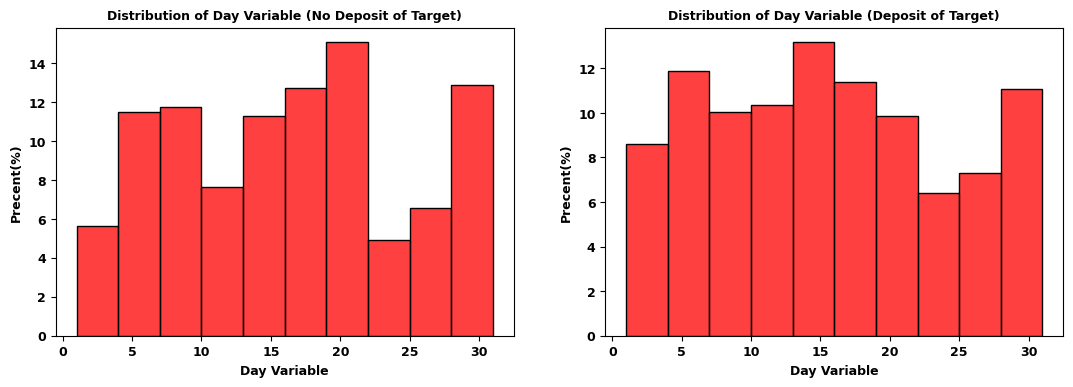

In [454]:
#day (day of the month) vs target
fig=plt.subplots(nrows=1, ncols=2, figsize=(13 , 4))

plt.subplot(1, 2,1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='day', color='red',
             edgecolor='black', stat='percent', element='bars', bins=10)

plt.title('Distribution of Day Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Day Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='day', color='red',
             edgecolor='black', stat='percent', element='bars', bins=10)


plt.title('Distribution of Day Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Day Variable', fontsize=9, fontweight='bold')


plt.show()

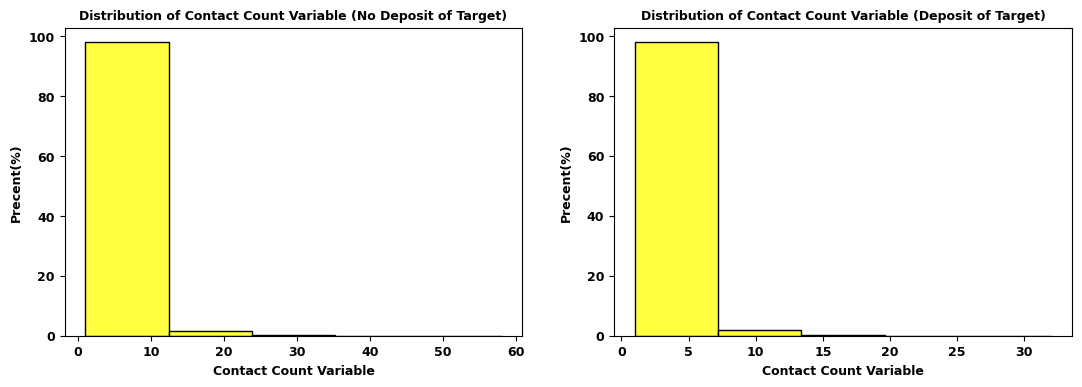

In [455]:
#Campaign : further renamed to contact_count
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='contact_count', color='yellow', edgecolor='black', stat='percent', element='bars', bins=5)


plt.title('Distribution of Contact Count Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Contact Count Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='contact_count', color='yellow', edgecolor='black', stat='percent', element='bars', bins=5)


plt.title('Distribution of Contact Count Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Contact Count Variable', fontsize=9, fontweight='bold')

plt.show()

In [456]:
#almost 95% of clients who opened deposit have been contacted up to 7-8 times,  but those who didn't open deposit have been contacted about 11-12 times
# this could imply that majority of clients who are interetsed in opening account, will do so after 7-8 times of
#Suggestion: Call Center employees may limit the number of calls to each customer to 8

In [457]:
#checking deposit/no-deposit vs contact count
pd.crosstab(index=data['contact_count'], columns=data['target'])


target         deposit  no-deposit
contact_count                     
1                 2431       14311
2                 1323       10615
3                  587        4690
4                  302        3097
5                  136        1567
6                   89        1145
7                   45         651
8                   30         486
9                   20         287
10                  13         242
11                  15         175
12                   4         145
13                   6         117
14                   4          81
15                   4          77
16                   2          73
17                   5          60
18                   0          47
19                   0          43
20                   1          41
21                   1          32
22                   0          20
23                   0          20
24                   1          19
25                   0          22
26                   0          12
27                   0           9
28                   0          16
29                   1          12
30                   0           8
31                   0          11
32                   1           8
33                   0           6
34                   0           4
35                   0           3
36                   0           4
37                   0           1
38                   0           3
39                   0           1
41                   0           2
43                   0           2
44                   0           1
46                   0           1
50                   0           2
51                   0           1
55                   0           1
58                   0           1

In [458]:
#it also approves that after certain number of calls (13-15) making more phone calls will not change customers' mind. Most customers make their decisions with less than 15 calls

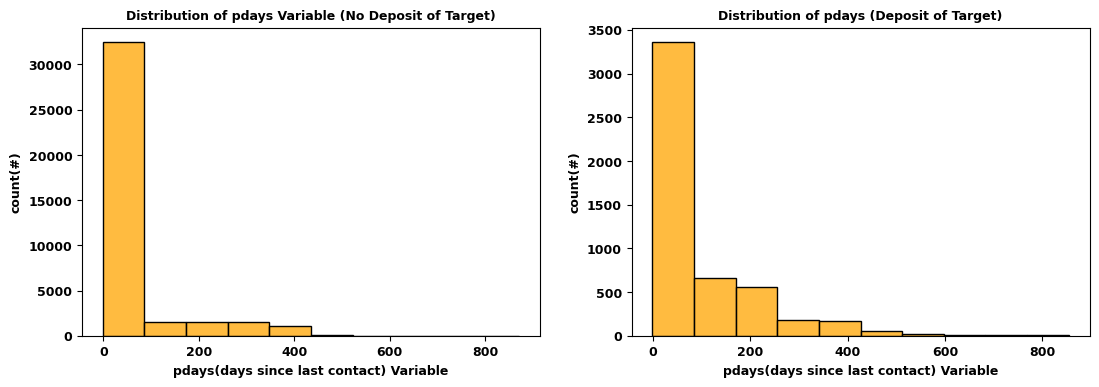

In [459]:
#pdays- number of days since last contact
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='pdays', color='orange', edgecolor='black', stat='count', element='bars', bins=10)


plt.title('Distribution of pdays Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('count(#)', fontsize=9, fontweight='bold')
plt.xlabel('pdays(days since last contact) Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='pdays', color='orange', edgecolor='black', stat='count', element='bars', bins=10)


plt.title('Distribution of pdays (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('count(#)', fontsize=9, fontweight='bold')
plt.xlabel('pdays(days since last contact) Variable', fontsize=9, fontweight='bold')

plt.show()

In [460]:
#indicates those clients who have been contacted more recent, are less likely to open term deposit account

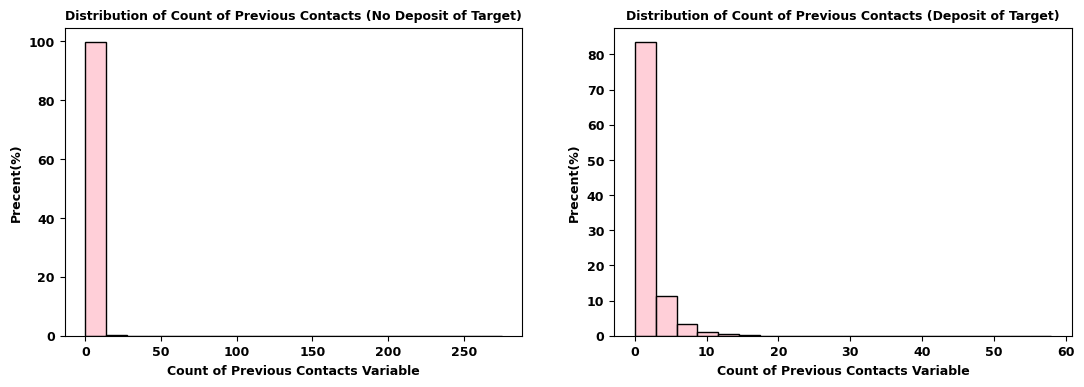

In [461]:
#previous( further changed to p_contact_count) : number of previous contacts to same client
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='p_contact_count', color='pink',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Count of Previous Contacts (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Count of Previous Contacts Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='p_contact_count', color='pink',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Count of Previous Contacts (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Count of Previous Contacts Variable', fontsize=9, fontweight='bold')

plt.show()

In [462]:
#over 95% of those who didn't open account have been contacted up to 25 times, 95% of those who opened deposit were contacted upto 9 times.
#We should also mention that we have 35281 clients that have not been contacted before meaning number 0 can highly impact our avarage number of calls

In [463]:
pd.crosstab(index=data['p_contact_count'], columns=data['target'])

target           deposit  no-deposit
p_contact_count                     
0                   3222       32059
1                    538        2113
2                    429        1575
3                    284         812
4                    166         527
5                    115         328
6                     82         186
7                     49         146
8                     38          89
9                     22          66
10                    25          38
11                    13          47
12                     9          33
13                     9          27
14                     5          14
15                     1          19
16                     0          13
17                     3          12
18                     0           6
19                     2           9
20                     1           7
21                     1           3
22                     1           5
23                     1           7
24                     0           5
25                     0           4
26                     1           1
27                     0           4
28                     0           2
29                     1           3
30                     1           2
32                     0           1
35                     0           1
37                     0           2
38                     0           2
40                     0           1
41                     0           1
51                     0           1
55                     1           0
58                     1           0
275                    0           1

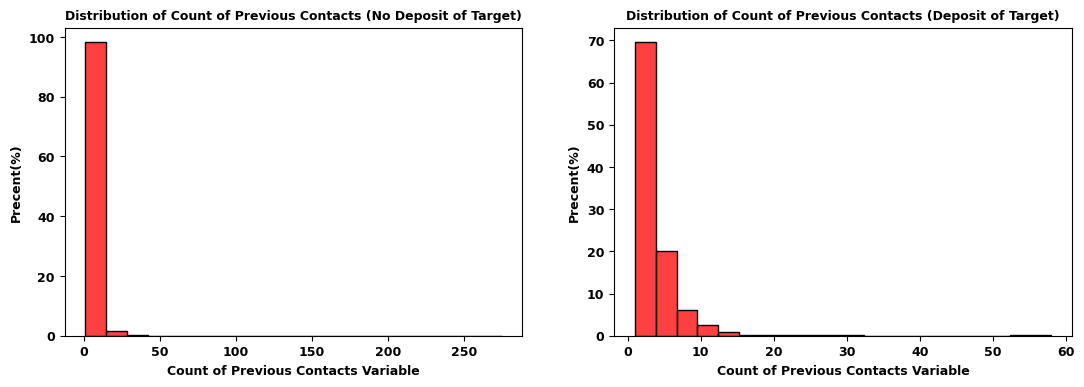

In [464]:
#testing same charts but this time we eliminate first campaigns
#previous( further changed to p_contact_count) : number of previous contacts to this client
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data[(data['target'] == 'no-deposit') & (data['first_campaign'] == 'n')], x='p_contact_count', color='red',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Count of Previous Contacts (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Count of Previous Contacts Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data[(data['target'] == 'deposit') & (data['first_campaign'] == 'n')], x='p_contact_count', color='red',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Count of Previous Contacts (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Count of Previous Contacts Variable', fontsize=9, fontweight='bold')

plt.show()

In [465]:
#Test : Data for first campaign=='n'
#data[(data['target'] == 'no-deposit') & (data['first_campaign'] == 'n')]

In [466]:
# not much difference even after we eliminate first campaign

# **Box Plot Visualizations**

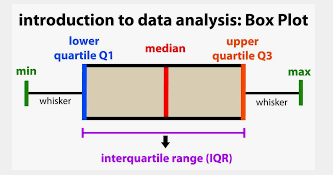

In [469]:
#Note: upper Q3- lower Q1 = IQR (interquartile range)
#IQR * a number (usually 1.5 this means we go 1.5 times of IQR to top and to bottom to define whiskers) = X
#Min = Q1-X
#Max = Q3+X
#anything out of Min and Max are outliers

In [470]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'contact_count', 'pdays',
       'p_contact_count', 'poutcome', 'target', 'pdays_group',
       'first_campaign'],
      dtype='object')

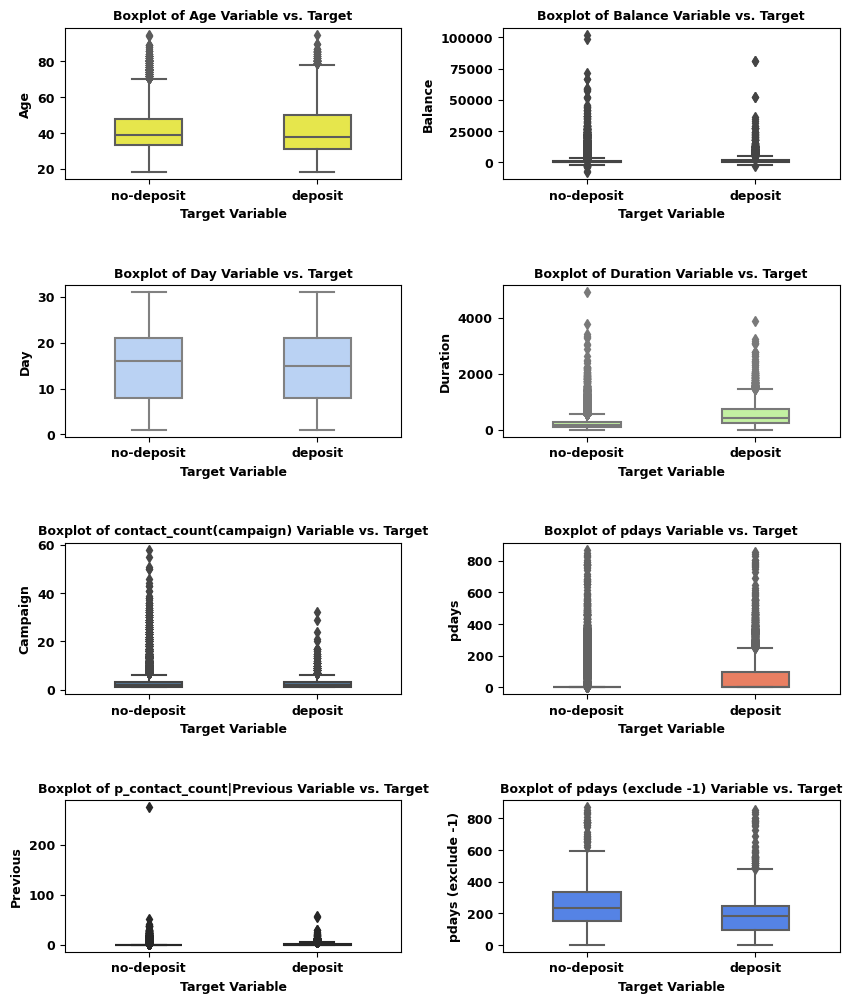

In [471]:
#Box plot
fig, ax= plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.7)

#---Age
plt.subplot(4, 2, 1)
sns.boxplot(data=data, x='target', y='age', color=colors[3], width=0.4)


plt.title('Boxplot of Age Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Age', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---Balance
plt.subplot(4, 2, 2)
sns.boxplot(data=data, x='target', y='balance', color=colors[2], width=0.4)


plt.title('Boxplot of Balance Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Balance', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


#---day
plt.subplot(4, 2, 3)
sns.boxplot(data=data, x='target', y='day', color=colors[5], width=0.4)


plt.title('Boxplot of Day Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Day', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---duration
plt.subplot(4, 2, 4)
sns.boxplot(data=data, x='target', y='duration', color=colors[7], width=0.4)


plt.title('Boxplot of Duration Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Duration', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---campaign|contact-count
plt.subplot(4, 2, 5)
sns.boxplot(data=data, x='target', y='contact_count', color=colors[2], width=0.4)


plt.title('Boxplot of contact_count(campaign) Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Campaign', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---pdays
plt.subplot(4, 2, 6)
sns.boxplot(data=data, x='target', y='pdays', color=colors[8], width=0.4)


plt.title('Boxplot of pdays Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('pdays', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---previous contact counts
plt.subplot(4, 2, 7)
sns.boxplot(data=data, x='target', y='p_contact_count', color=colors[4], width=0.4)


plt.title('Boxplot of p_contact_count|Previous Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Previous', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


#Delete the last plot
#fig.delaxes(ax[3, 1])

#Adding a new box plot to view pdays eliminating first campaign

#pdays eliminating -1
plt.subplot(4, 2, 8)
sns.boxplot(data=data[data['first_campaign'] == 'n'], x='target', y='pdays', color=colors[10], width=0.4)


plt.title('Boxplot of pdays (exclude -1) Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('pdays (exclude -1)', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')




plt.show()

Text(0.5, 0, 'Target Variable')

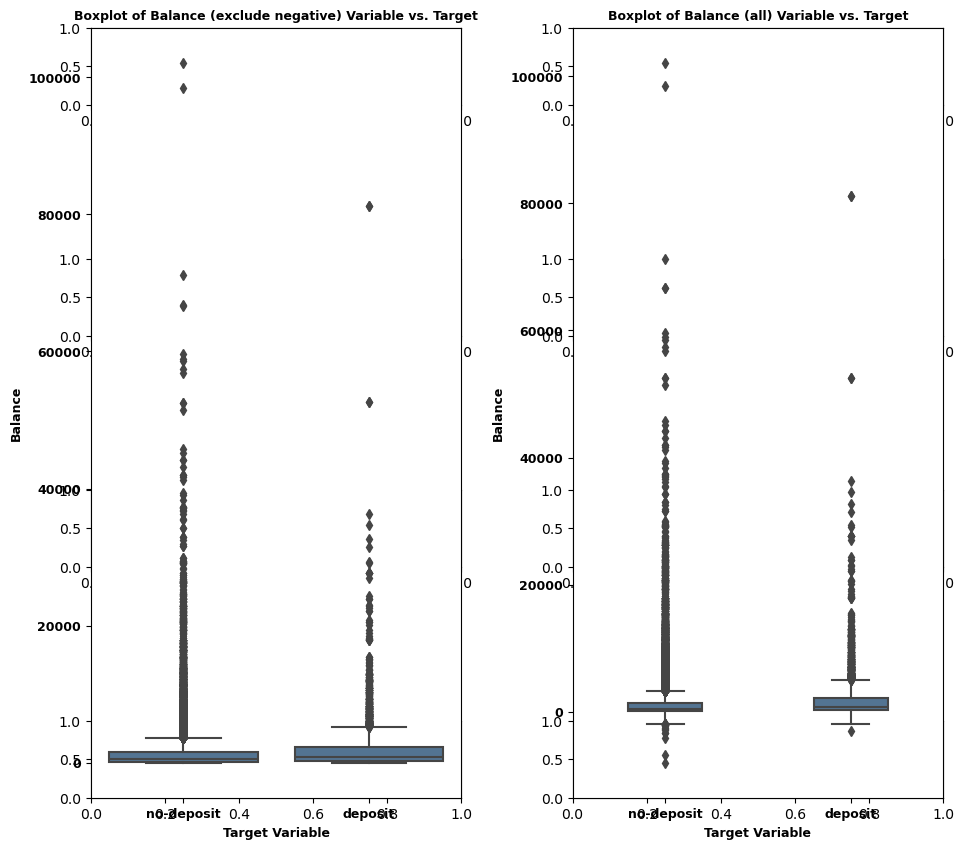

In [472]:
#let's assume we eliminate negative balance
#---Balance

#Box plot
fig, ax= plt.subplots(nrows=4, ncols=2, figsize=(11, 10))
plt.subplots_adjust(wspace=0.3, hspace=2)

plt.subplot(1,2,1)
sns.boxplot(data=data[data['balance'] >= 0], x='target', y='balance', color=colors[2], width=0.8)


plt.title('Boxplot of Balance (exclude negative) Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Balance', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


#compare with all balances
#---Balance
plt.subplot(1,2,2)
sns.boxplot(data=data, x='target', y='balance', color=colors[2], width=0.4)


plt.title('Boxplot of Balance (all) Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Balance', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

In [473]:
#Majority of balances<0 belong to no-deposit.

In [474]:
data.describe().T

count         mean          std     min    25%    50%  \
age              43193.0    40.764082    10.512640    18.0   33.0   39.0   
balance          43193.0  1354.027342  3042.103625 -8019.0   71.0  442.0   
day              43193.0    15.809414     8.305970     1.0    8.0   16.0   
duration         43193.0   258.323409   258.162006     0.0  103.0  180.0   
contact_count    43193.0     2.758178     3.063987     1.0    1.0    2.0   
pdays            43193.0    40.404070   100.420624    -1.0   -1.0   -1.0   
p_contact_count  43193.0     0.584863     2.332672     0.0    0.0    0.0   

                    75%       max  
age                48.0      95.0  
balance          1412.0  102127.0  
day                21.0      31.0  
duration          318.0    4918.0  
contact_count       3.0      58.0  
pdays              -1.0     871.0  
p_contact_count     0.0     275.0

In [475]:
#looking at pdays Min, 1st qtr, 2nd qtr, 3rd qtr are same.That's why we don't see a box plot.This is because we have over 80% of data as -1 .

In [476]:
#for those variables that you don't get a good graph use violonplot or swarmplot

# **Scatter Plot Visualizations**

In [495]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#define a function to get variables and illustrate the chart
def plot_scatter(dataframe, column1, column2, title=None, xlabel=None, ylabel=None, hue=None):
    if column1 not in dataframe.columns or column2 not in dataframe.columns:
        raise ValueError(f"Columns {column1} and {column2} must exist in the dataframe.")
    if not pd.api.types.is_numeric_dtype(dataframe[column1]) or not pd.api.types.is_numeric_dtype(dataframe[column2]):
        raise ValueError(f"Columns {column1} and {column2} must be numeric.")

    plt.figure(figsize=(7, 4))


    scatter_plot = sns.scatterplot(data=dataframe, x=column1, y=column2, hue=hue, edgecolor=None, s=20)
    sns.regplot(data=dataframe, x=column1, y=column2, scatter=False, color='black')

    scatter_plot.set_title(title if title else 'Scatter Plot', fontsize=9, fontweight='bold')
    scatter_plot.set_xlabel(xlabel if xlabel else column1, fontsize=9, fontweight='bold')
    scatter_plot.set_ylabel(ylabel if ylabel else column2, fontsize=9, fontweight='bold')

    plt.show()

In [497]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'contact_count', 'pdays',
       'p_contact_count', 'poutcome', 'target', 'pdays_group',
       'first_campaign'],
      dtype='object')

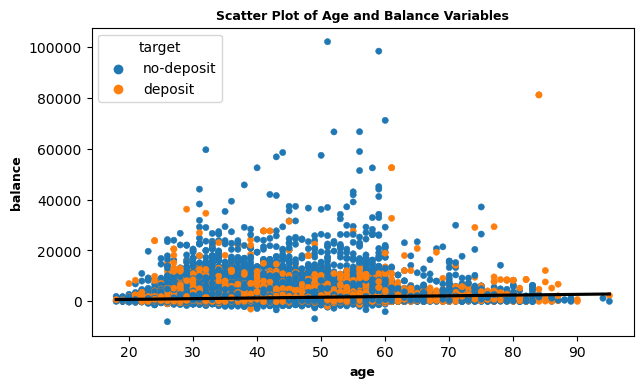

In [499]:
plot_scatter(data, 'age', 'balance', hue='target', title='Scatter Plot of Age and Balance Variables')

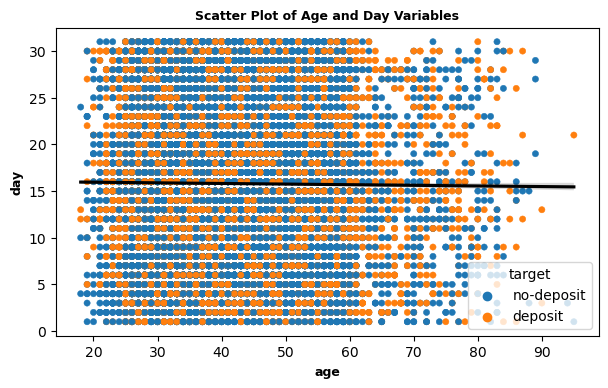

In [505]:
plot_scatter(data, 'age', 'day', hue='target', title='Scatter Plot of Age and Day Variables')

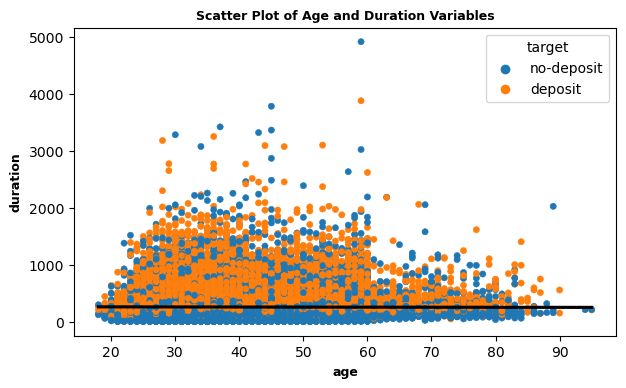

In [501]:
plot_scatter(data, 'age', 'duration', hue='target', title='Scatter Plot of Age and Duration Variables')

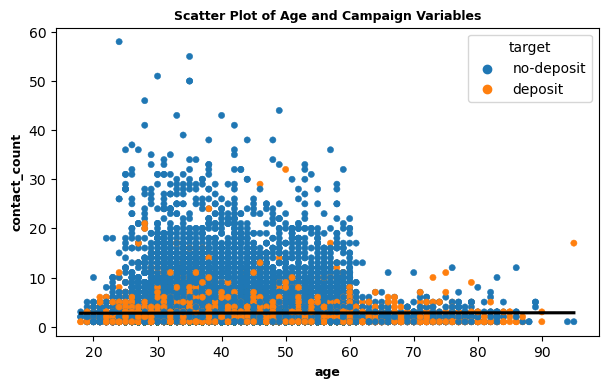

In [507]:
plot_scatter(data, 'age', 'contact_count', hue='target', title='Scatter Plot of Age and Campaign Variables')

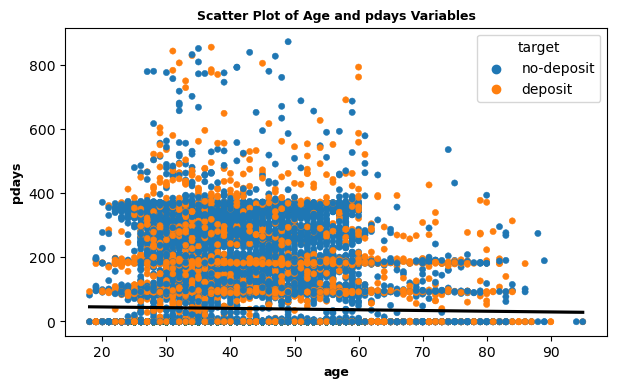

In [509]:
plot_scatter(data, 'age', 'pdays', hue='target', title='Scatter Plot of Age and pdays Variables')

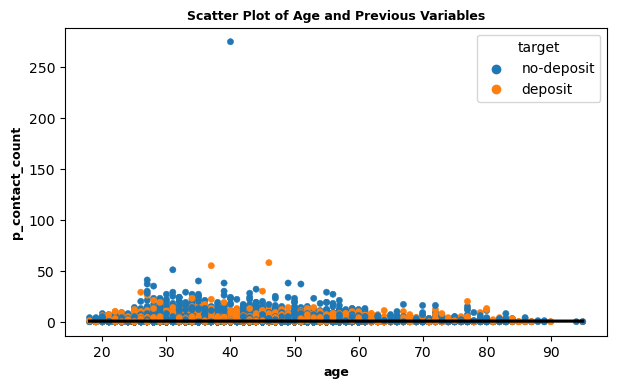

In [511]:
plot_scatter(data, 'age', 'p_contact_count', hue='target', title='Scatter Plot of Age and Previous Variables')

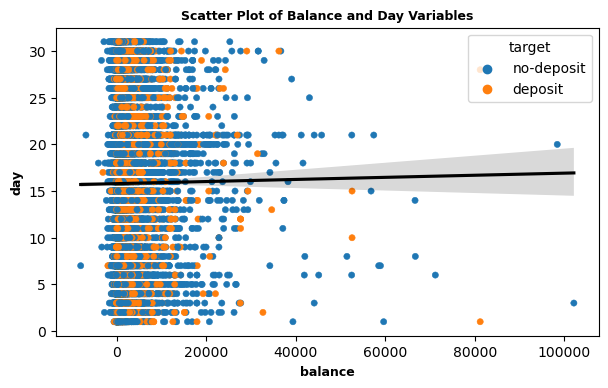

In [513]:
plot_scatter(data, 'balance', 'day', hue='target', title='Scatter Plot of Balance and Day Variables')

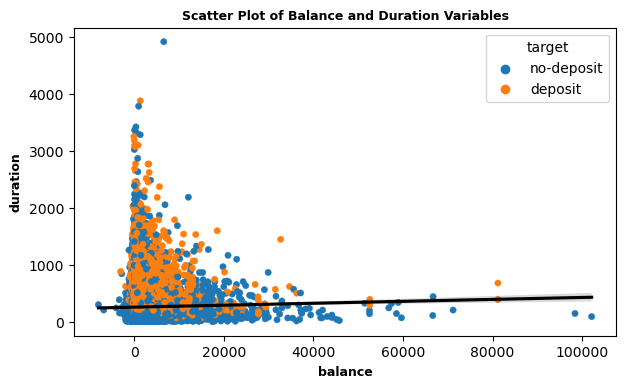

In [515]:
plot_scatter(data, 'balance', 'duration', hue='target', title='Scatter Plot of Balance and Duration Variables')

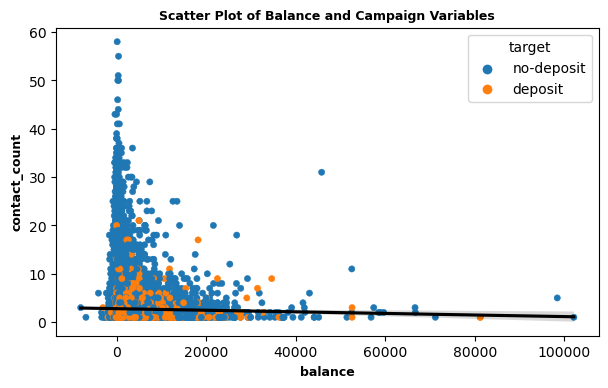

In [517]:
plot_scatter(data, 'balance', 'contact_count', hue='target', title='Scatter Plot of Balance and Campaign Variables')

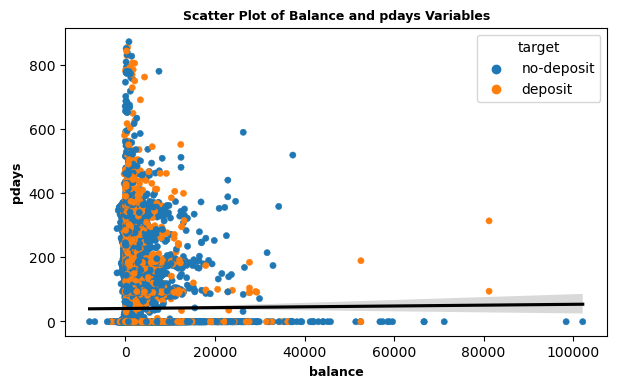

In [519]:
plot_scatter(data, 'balance', 'pdays', hue='target', title='Scatter Plot of Balance and pdays Variables')

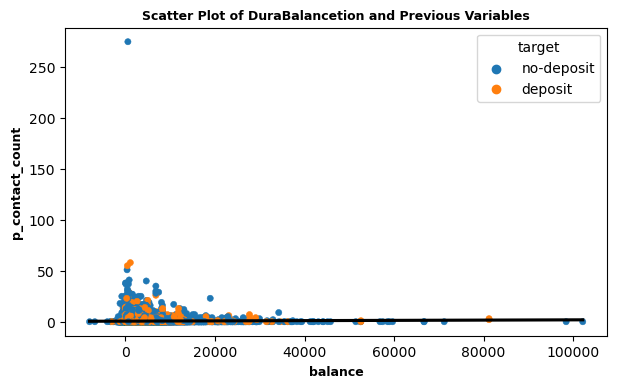

In [521]:
plot_scatter(data, 'balance', 'p_contact_count', hue='target', title='Scatter Plot of DuraBalancetion and Previous Variables')

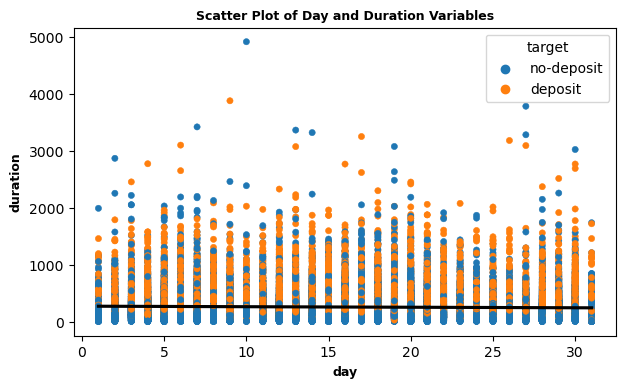

In [523]:
plot_scatter(data, 'day', 'duration', hue='target', title='Scatter Plot of Day and Duration Variables')

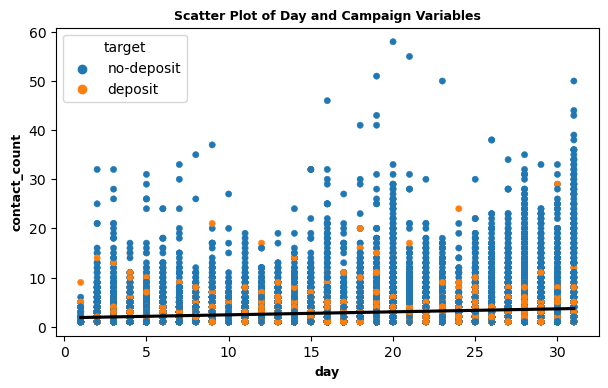

In [525]:
plot_scatter(data, 'day', 'contact_count', hue='target', title='Scatter Plot of Day and Campaign Variables')

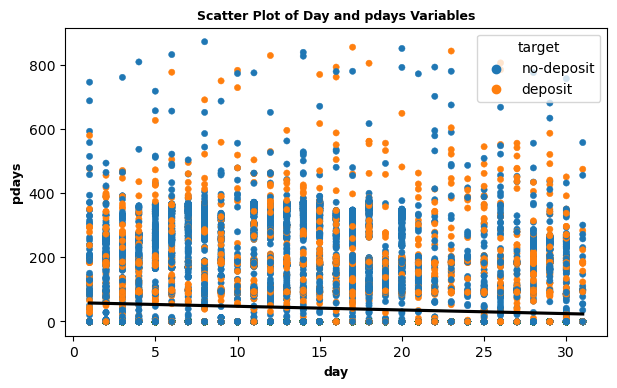

In [527]:
plot_scatter(data, 'day', 'pdays', hue='target', title='Scatter Plot of Day and pdays Variables')

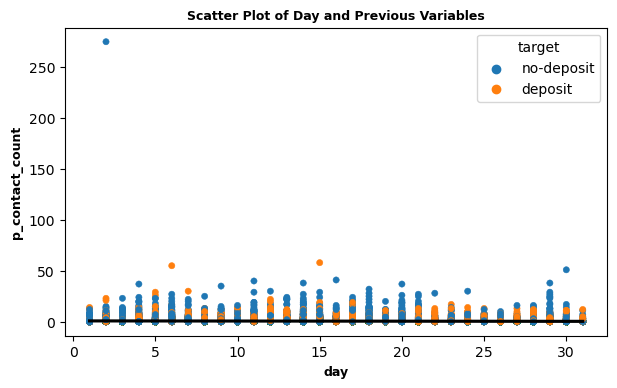

In [529]:
plot_scatter(data, 'day', 'p_contact_count', hue='target', title='Scatter Plot of Day and Previous Variables')

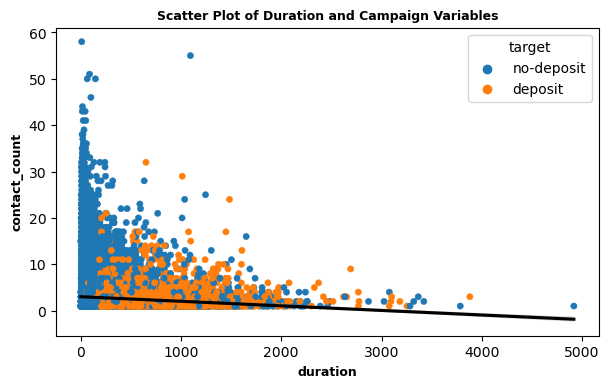

In [531]:
plot_scatter(data, 'duration', 'contact_count', hue='target', title='Scatter Plot of Duration and Campaign Variables')

In [ ]:
#This indicates majority of deposits are within 1-10 contacts with higher average duration time

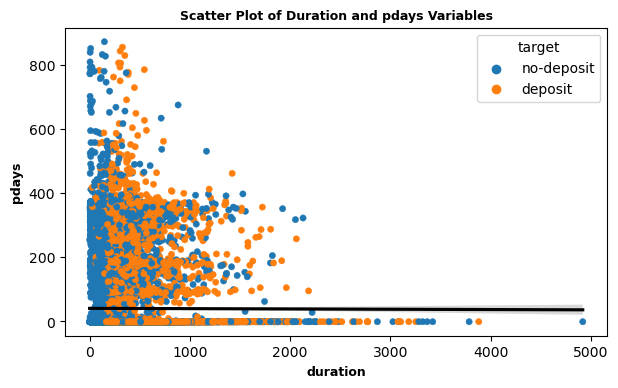

In [533]:
plot_scatter(data, 'duration', 'pdays', hue='target', title='Scatter Plot of Duration and pdays Variables')

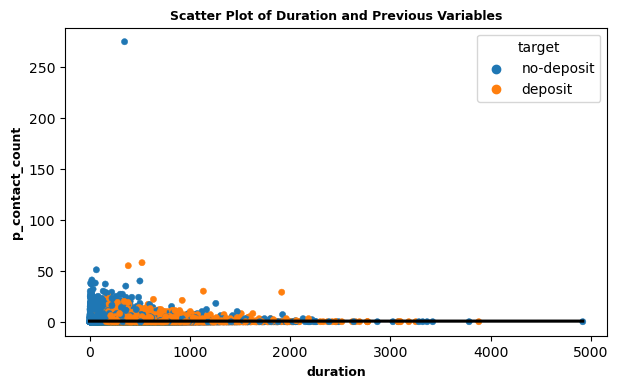

In [535]:
plot_scatter(data, 'duration', 'p_contact_count', hue='target', title='Scatter Plot of Duration and Previous Variables')

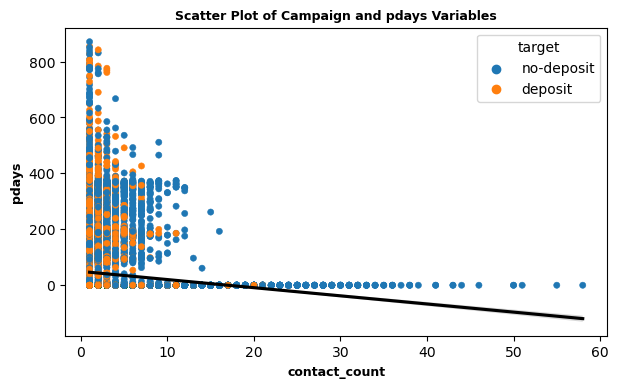

In [537]:
plot_scatter(data, 'contact_count', 'pdays', hue='target', title='Scatter Plot of Campaign and pdays Variables')

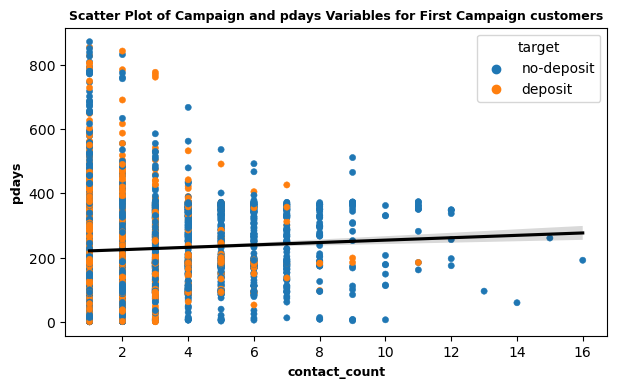

In [539]:
data_FirstCampaign = data[data['pdays'] != -1]
plot_scatter(data_FirstCampaign, 'contact_count', 'pdays', hue='target', title='Scatter Plot of Campaign and pdays Variables for First Campaign customers')


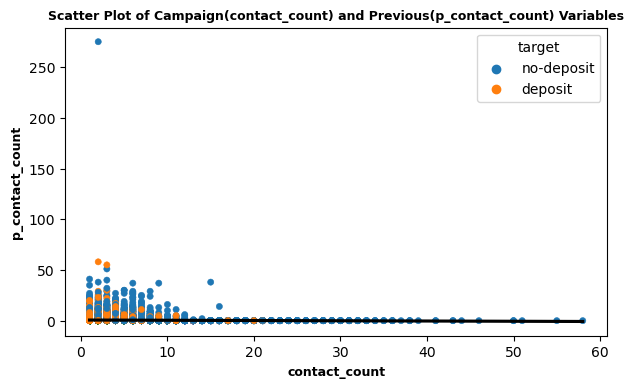

In [541]:
plot_scatter(data, 'contact_count', 'p_contact_count', hue='target', title='Scatter Plot of Campaign(contact_count) and Previous(p_contact_count) Variables')

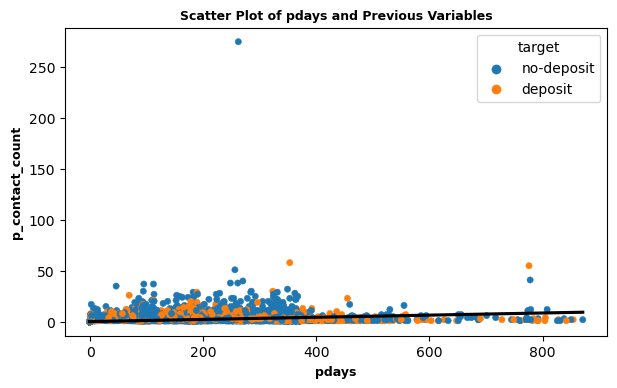

In [543]:
plot_scatter(data, 'pdays', 'p_contact_count', hue='target', title='Scatter Plot of pdays and Previous Variables')

# **Box Plots and Bar plots Visualizations**

In [551]:
def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

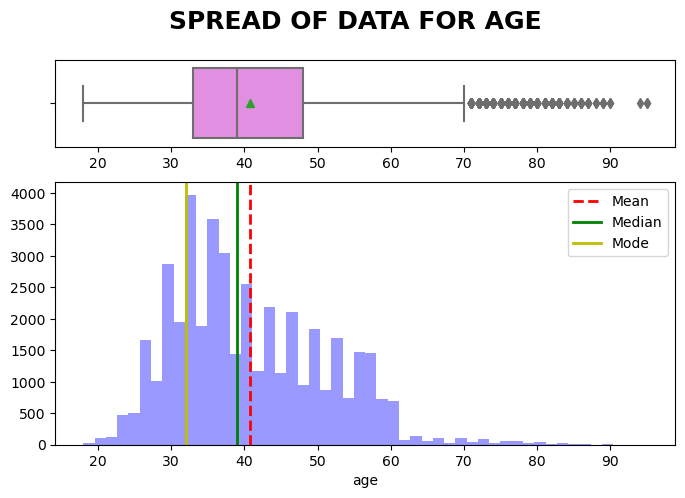

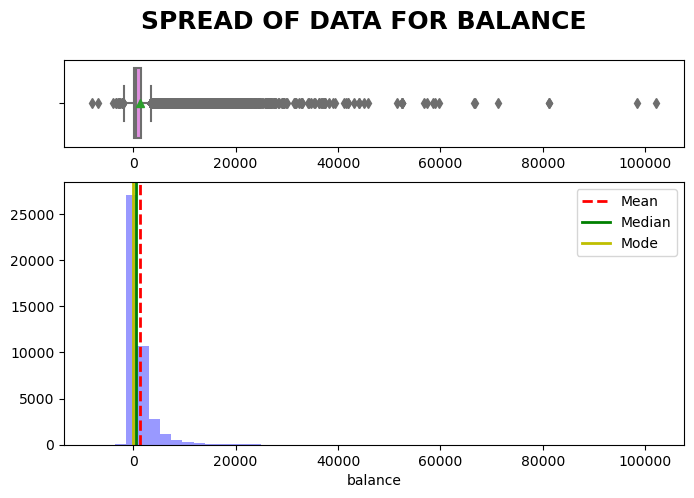

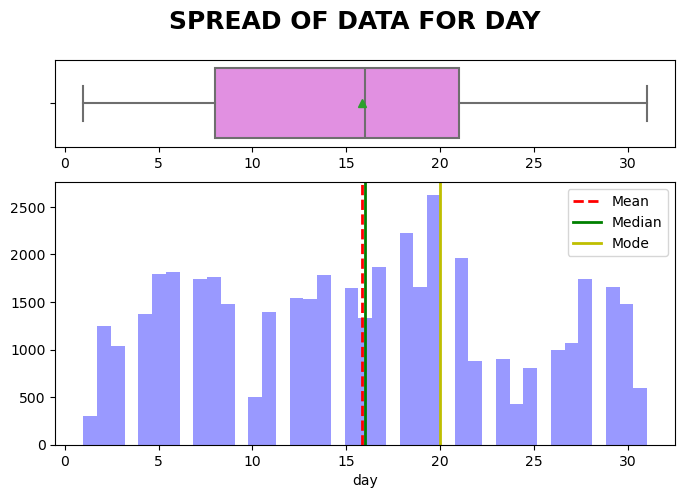

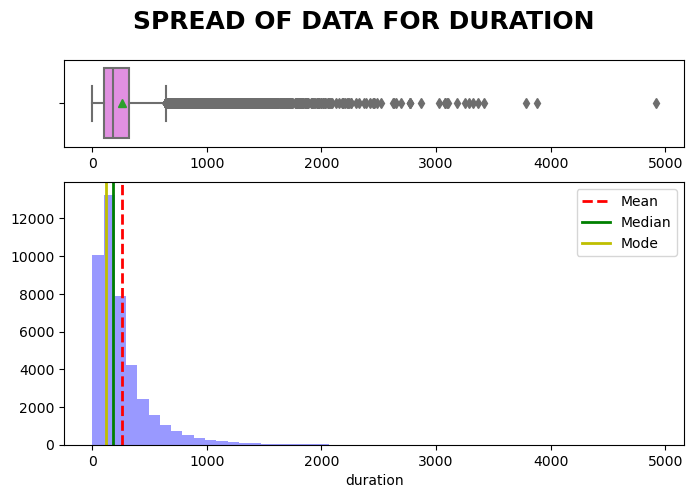

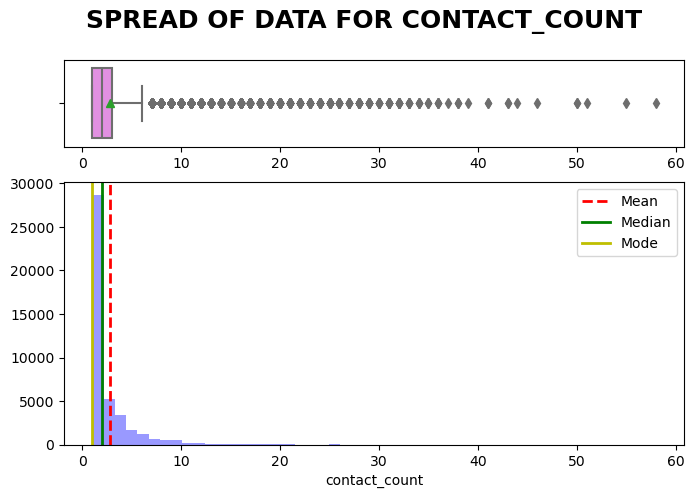

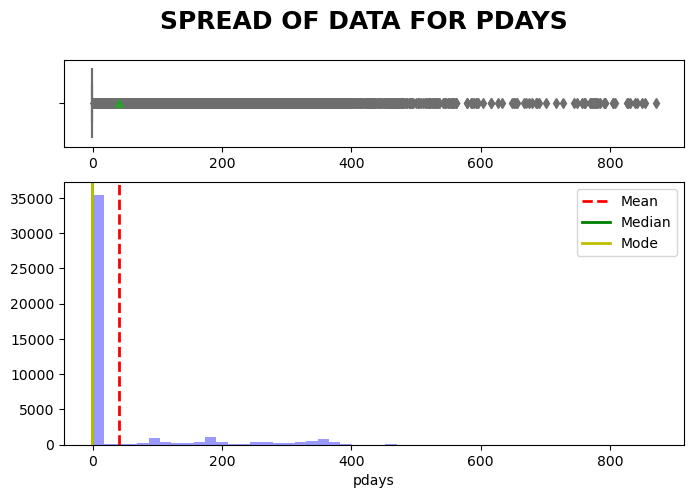

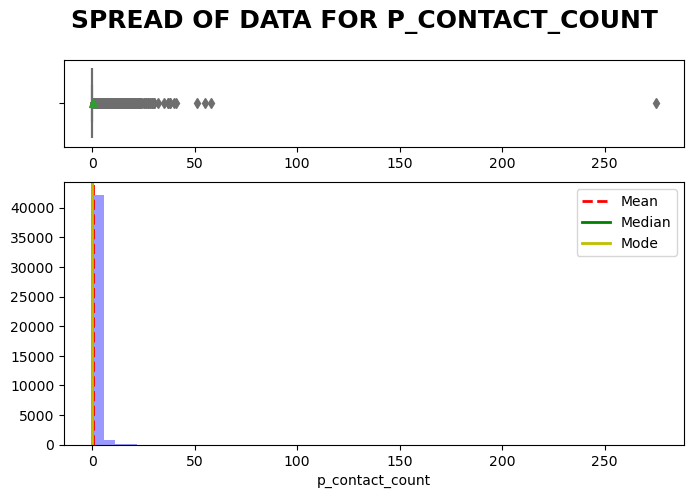

In [549]:
list_col=  numerical_features #data.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(data[list_col[i]])